## Исследование данных о российском кинопрокате



___Заказчик исследования:___
Министерство культуры Российской Федерации. 

___Главная цель исследования:___ изучить рынок российского кинопроката и выявить текущие тренды, оценить интерес зрителей к фильмам, получившим государственную поддержку.

___Данные для анализа:___
данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

___Основые задачи исследования:___
1. Изучение количества фильмов, вышедших в прокат, по годам.
2. Изучение динамики проката по годам.
3. Изучение суммы сборов по каждому году. 
4. Анализ влияния возрастного ограничени аудитории на сумму сборов.
5. Анализ фильмов, получивших господдержку.

___План проведения исследования:___
1. [Загрузка данных, изучение общей информации о данных и их структуре](#загрузка-данных)
    - [загрузка данных, просмотр фрагментов данных, получение общей информации](#загрузка-датасетов)
    - [объединение данных в один датафрейм](#объединение-таблиц)
    - [промежуточный вывод](#промежуточный-вывод-1)
2. [Предобработка данных](#предобработка-данных)
    - [изучение типов данных, их преобразование (в случае необходимости)](#проверьте-типы-данных) 
    - [работа с пропусками](#изучение-пропусков-в-данных)
    - [поиск дубликатов](#поиск-дубликатов)
    - [изучение категориальных значений](#изучение-категориальных-значений)
    - [изучение количественных значений](#изучение-количественных-значений)
    - [добавление вспомогательных столбцов](#добавление-вспомогательных-столбцов)
    - [промежуточный вывод](#промежуточный-вывод-2)
3. [Исследовательский анализ данных](#исследовательский-анализ-данных)
    - [анализ количества фильмов, вышедших в прокат, по годам](#количество-фильмов-по-годам)
    - [изучение динамики проката по годам](#динамика-проката)
    - [построение сводной таблицы о средней и медианной сумме сборов по годам](#сводная-таблица)
    - [изучение влияния возрастного ограничения на сборы](#влияние-возрастного-ограничения)
    - [промежуточный вывод](#промежуточный-вывод-3)
4. [Анализ фильмов, получивших государственную поддержку](#фильмы-получившие-господдержку)
    - [анализ изменения государственного финансирования по годам](#господдержка-количество-фильмов-по-годам)
    - [анализ господдержки в зависимости от жанра](#господдержка-по-жанрам)
    - [анализ господдержки в зависимости от источника финансирования](#господдержка-источник-финансирования)
    - [анализ окупаемости фильмов ,получивших господдержку](#господдержка-окупаемость)
    - [анализ рейтинга фильмов, получивших господдержку](#господдержка-рейтинг)
    - [анализ возрастного ограничения фильмов, получивших господдержку](#господдержка-возрастное-ограничение)
    - [промежуточный вывод](#промежуточный-вывод-4)
5. [Общий вывод](#общий-вывод)

<a name="загрузка-данных"></a>
### Загрузка и обзор данных 

<a name="загрузка-датасетов"></a>
Подключим библиотеки, необходимые для работы с данными. Выполним настройку формата отображения чисел с плавающей запятой.

In [1]:
# подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import re 
import numpy as np
import seaborn as sns

# настройка формата отображения чисел с плавающей запятой
pd.set_option('display.float_format', '{:,.2f}'.format)

Загрузим датасеты, выведем первые 5 строк и общую информацию о них.

In [ ]:
# загрузка данных о прокатных удостоверениях
mkrf_movies = pd.read_csv('/datasets/movies_certificates.csv')

In [ ]:
# загрузка данных о прокате в российских кинотеатрах
mkrf_shows = pd.read_csv('/datasets/film_exhibitions.csv')

In [4]:
# выведем 5 первых строк таблицы mkrf_movies
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
# получим общую информацию о таблице mkrf_movies
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
# выведем 5 первых строк таблицы mkrf_shows
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [7]:
# получим общую информацию о таблице mkrf_shows
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


<a name="объединение-таблиц"></a>
Будем выполнять объединение таблиц по совпадающим значениям столбца 'puNumber', который есть в обеих таблицах и хранит номер прокатного удостоверения. В этом стобце нет пропусков. Тип данных столбца в таблице mkrf_movies определен как 'object', что говорит о том, что в нем встречаются не только целочисленные значения.

In [8]:
# отобразим значения, которые не являются числовыми
mkrf_movies[pd.to_numeric(mkrf_movies['puNumber'], errors='coerce').isnull()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Такая строка всего одна, наполовину состоит из пропусков, удалим её из таблицы.

In [9]:
# удалим строку с неверным значением в столбце 'puNumber'
mkrf_movies = mkrf_movies[mkrf_movies['puNumber'] != 'нет']
# убедимся, что удалили только одну строку
mkrf_movies.shape[0]

7485

Теперь выполним преобразование типа данных в столбце 'puNumber' в числовой и проверим изменения.

In [10]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: float6

Объединим таблицы в один датафрейм по столбцу 'puNumber'.

In [11]:
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

Убедимся, что итоговый датафрейм содержит все объекты из mkrf_movies.

In [12]:
all_objects_in_data = data['puNumber'].isin(mkrf_movies['puNumber']).all()
print("Итоговый датафрейм содержит все объекты из mkrf_movie:", all_objects_in_data)

Итоговый датафрейм содержит все объекты из mkrf_movie: True


Переименуем столбец 'puNumber', чтобы он был написан в "snake case".

In [13]:
data = data.rename(columns={'puNumber': 'pu_number'})

Мы подготовили данные для дальнейшей работы. Получим общую информацию.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<a  name="промежуточный-вывод-1"></a>
__Промежуточный вывод__:
- для проведения анализа объединили данные в один датафрейм, проверили, что все объекты из датасета mkrf_movies вошли в него;
- множество столбцов содержат пропуски;
- некоторые типы данных не соответствуют хранимому значению;
- переименован столбец `pu_number` и приведен к типу int. 

<a name="предобработка-данных"></a>
### Предобработка данных

<a name="проверьте-типы-данных"></a>
#### Проверка типов данных

Изучив описание данных, а также общую информацию о данных, видим, что необходимо выполнить следующие преобразования типов данных:
- show_start_date - дата премьеры фильма (преобразуем в datetime);
> Используем одно из значений из столбца, чтобы определить формат. `2015-07-29T12:00:00.000Z` - эта строка содержит дату в формате %Y-%m-%dT%H:%M:%S.%fZ.
- ratings — рейтинг фильма на КиноПоиске (преобразуем в float).

In [15]:
# преобразуем тип  данных в столбце 'show_start_date' в datetime
try:
    data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
except:
    'Произошла ошибка при преобразовании типа данных столбца show_start_date'    

Проверим, какие значения содержатся в столбце 'ratings'.

In [16]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

Значения, записанные в виде процентов, необходимо преобразовать.  Например, 99% преобразуем в 9.9.

In [17]:
# приведем все значения к одному виду
data['ratings'] = data['ratings'].apply(lambda x: str(int(x.replace('%', ''))/10) if '%' in str(x) else x)

Теперь можно выполнить преобразование типа данных в столбце 'ratings' в числовой тип данных.

In [18]:
data['ratings'] = data['ratings'].astype('float')

Данные в столбцах, содержащих информацию о господдержке, не можем преобразовать в int из-за наличия пропусков. Преобразования типов завершены. Для проверки получим общую информацию о данных.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

<a name="изучение-пропусков-в-данных"></a>
#### Обработка пропущенных значений

Сделаем копию датасета для дальнейшего контроля изменения размера датасета до и после обработки.

In [20]:
temp = data.copy()
len(temp)

7485

Изучим, какие столбцы содержат пропущенные значения.

In [21]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

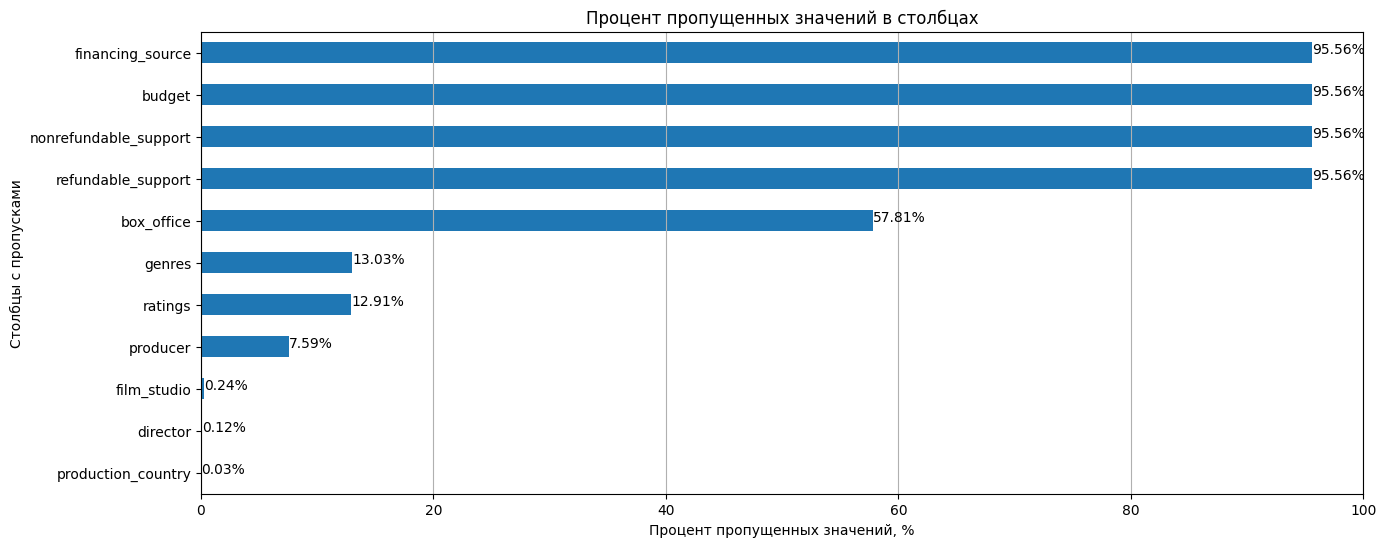

In [22]:
ax = (
    (data.isna().mean() * 100)
    .to_frame()
    .rename(columns={0: 'percentage_of_missing_values'})
    .query('percentage_of_missing_values > 0')
    .sort_values(by='percentage_of_missing_values')
    .plot(kind='barh', figsize=(15, 6), title='Процент пропущенных значений в столбцах', legend=False, xlim=(0, 100))
)
ax.grid(axis='x')
ax.set(xlabel='Процент пропущенных значений, %', ylabel='Столбцы c пропусками');

# Добавление меток к столбцам с коррекцией координат для избежания перекрытия
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', ((p.get_width()), p.get_y() + p.get_height() / 2))

plt.show()

Найдем коэффициенты корреляции для пропуcков в столбцах `budget`, `financing_source`, `refundable_support`, `nonrefundable_support`.

In [23]:
# построим матрицу корреляции для пропущенных значений
data[['budget', 'financing_source', 'refundable_support', 'nonrefundable_support']].isnull().corr()

,budget,financing_source,refundable_support,nonrefundable_support
budget,1.00,1.00,1.00,1.00
financing_source,1.00,1.00,1.00,1.00
refundable_support,1.00,1.00,1.00,1.00
nonrefundable_support,1.00,1.00,1.00,1.00


В нашем случае коэффициенты 1 означают, что в случае присутствия одного признака, присутствует и другой (для нас важно, что если пропущено значение в столбце 'budget', то есть пропуски и в остальных столбцах).

Проанализируем все пропуски по порядку.

Как нам известно из описания данных, столбец 'budget' заполнен только для тех фильмов, которые получили государственную поддержку. Это позволяет нам полагать, что 95.56% фильмов из выборки не использовали государственное финансирование, поэтому возникли пропуски в следующих столбцах:
- budget — общий бюджет фильма;
- financing_source — источник государственного финансирования;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки.

Заполнять их не будем, это позволит нам осуществлять фильтрацию данных и корректные вычисления (не отразится на средних значениях).

Кроме названных выше столбцов, пропуски также обнаружены в следующих столбцах:
- box_office — сборы в рублях
- genres — жанр фильма
- ratings — рейтинг фильма на КиноПоиске
- producer — продюсер
- film_studio — студия-производитель
- production_country — страна-производитель
- director — режиссёр

Сложно предположить логичную замену пропускам в столбце `box_office`. Очень многие факторы могли повлиять на итоговую сумму сборов. В частности, мы не знаем, на какие именно способы использования фильма и на какой срок выдавалось прокатное удостоверение. В данном случае от заполнения пропусков будет больше вреда, чем пользы. Оставляем как есть.

Для заполнения пропущенных значений в остальных столбцах попробуем найти фильмы, у которых совпадает название и режиссер, и при этом у некоторых есть пропуски в одном из перечисленных столбцов, а для других данные заполнены. 

In [24]:
def get_table_for_check_missing_values(data, columns, column_with_missing_values):
    """
    Функция возвращает отфильтрованную выборку из данных, сгруппированных по столбцам из списка columns, 
    содержащую данные, в которых в каждой группе есть хотя бы одно пропущенное и хотя бы одно заполненное значение
    в столбце column_with_missing_values.
    """
    return (
        data
        .groupby(columns)
        .filter(
            lambda x: x[column_with_missing_values].notna().any() and x[column_with_missing_values].isna().any()
        )
    )    

In [25]:
for column in ['genres', 'ratings', 'producer', 'film_studio', 'production_country']:
    print(f" Найдено записей для столбца '{column}': \
{get_table_for_check_missing_values(data, ['title', 'director'], column).shape[0]}")

 Найдено записей для столбца 'genres': 0
 Найдено записей для столбца 'ratings': 0
 Найдено записей для столбца 'producer': 0
 Найдено записей для столбца 'film_studio': 0
 Найдено записей для столбца 'production_country': 0


Поищем такие записи для пропущенных значений в стобце `director`.

In [26]:
get_table_for_check_missing_values(data, ['title'], 'director')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Проверка показала, что такие фильмы у нас отсутствуют. Найдем количество стран-производителей, соответствующих студиям.

In [27]:
(
    data
    .pivot_table(index='film_studio', values='production_country', aggfunc=lambda x: len(x.unique()))
    .sort_values(by='production_country', ascending=False)
)

,production_country
film_studio,
"Киностудия ""Мосфильм""",9
"Уорнер Бразерс, Виллидж Роадшоу Пикчерз",4
Опус Арте,3
"Аймакс Корпорэйшн, Уорнер Бразерс",3
"3D Продуциони, Нексо Диджитал",3
...,...
"Киностудия ""Союзмультфильм""",1
"Киностудия ""Мосфильм"", Телевидение ВНР",1
"Киностудия ""Мосфильм"", Творческое объединение ""Студио""",1


Здесь также однозначного соответствия нет, т.к. определение страны-производителя связано с разными факторами.

Подводя итог по работе с пропущенными значениями, можно сказать следующее:
- пропуски в данных о государственном финансировании (столбцы `budget`, `financing_source`, `refundable_support`, `nonrefundable_support`) вызваны тем, что большую часть выборки составляют фильмы, не получавшие государственного финансирования, а для них указанные столбцы не заполнялись; 
- более чем для половины фильмов отсутствуют данные о кассовых сборах при показах фильмов в российских кинотеатрах. Возможно, информация не была предоставлена для подсчета статистики, либо она была предоставлена некорректно, несвоевременно, и не была учтена в итоговых отчетах;
- информация о рейтинге фильма на КиноПоиске может отсутствовать из-за того, что рейтинг у фильма пока что не был сформирован;
- отсутствует информация о жанре, продюсере, наименьшее количество пропусков в данных о режиссере, студии и стране производства фильма.

<a name="поиск-дубликатов"></a>
#### Дубликаты

Проверим наличие явных дубликатов в данных.

In [28]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют. Попробуем найти неявные дубликаты по сумме ключевых параметров: по номеру прокатного удостоверения, названию и режиссеру. 

In [29]:
data[data.duplicated(['pu_number', 'title', 'director'],  keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Такие значения также отсутствуют. Т.к. у одного фильма может быть несколько прокатных удостоверений, записи об одном фильме с разными номерами удостоверений не будут дубликатами, их мы не ищем.

Также в данных присутствуют 2 пары фильмов, имеющих одинаковые номер прокатного удостоверения. Это может быть вызвано человеческой ошибкой при заполнении формы  о фильмах, т.к. часть параметров у фильмов отличаются. Это не должно повлиять на результаты исследования.

In [30]:
data[data.duplicated(['pu_number'],  keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Выполним повторный поиск дубликатов после того, как изучим и обработаем категориальные и количественные значения.

<a name="изучение-категориальных-значений"></a>
#### Категориальные значения

В нашем датафрейме следующие столбцы содержат категориальные значения:

- title — название фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- financing_source — источник государственного финансирования;
- genres — жанр фильма.

Посмотрим на уникальные значения в каждом столбце.

In [31]:
data['title'].value_counts()

title
День святого Валентина_                               5
Белоснежка и охотник                                  4
Красавчик-2                                           4
Рапунцель: Запутанная история                         4
Кошмар на улице Вязов /Фильм ужасов/                  4
                                                     ..
Достали!                                              1
МУЛЬТ в кино. Выпуск № 14                             1
Стажёр                                                1
Мэхэббэт - ул йорэк эше (Любовь - это дело сердца)    1
Машины песенки. Серия "Когда цветут кактусы"          1
Name: count, Length: 6771, dtype: int64

In [32]:
data['type'].value_counts()

type
Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: count, dtype: int64

In [33]:
data['film_studio'].value_counts()

film_studio
Киностудия "Мосфильм"                                                                                                      341
ООО "Мульт в кино"                                                                                                          57
Анимаккорд Лтд                                                                                                              23
ООО "Мульт в кино"                                                                                                          18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                      16
                                                                                                                          ... 
Эден Рок Медиа, Филм Нэйшн Интертейнмент, Флинн Пикчерз Компани, Нью Лайн Синема, Силвер Рил, Суперсенсори, Вентюр Ворт      1
Мажестик Филмпродуцион, Айрис Продакшнз, Рат Пак Филмпродуцион, Фред Фильм                         

In [34]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [35]:
data['director'].value_counts()

director
О.Семёнова                  47
Д.Червяцов                  17
Стивен Содерберг            17
Ридли Скотт                 16
Тиль Швайгер                14
                            ..
Афонсо Пойарт                1
Том Коркоран                 1
Е.Сергеев                    1
Фернандо Гонзалез Молина     1
И.Трусов                     1
Name: count, Length: 4811, dtype: int64

In [36]:
data['producer'].value_counts()

producer
П.Смирнов                                                                     67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                                 28
С.Сельянов                                                                    18
Д.Ловейко, О.Кузовков                                                         17
Тони Майерс                                                                   11
                                                                              ..
Б.Гуц, А.Гусенцова                                                             1
Лоран Петен, Мишель Петен                                                      1
 ООО "КиноФирма"                                                               1
Э.Илоян, В.Шляппо, А.Троцюк, Д.Жалинский, Д.Дьяченко, М.Ткаченко, А.Рубцов     1
Дженнифер Додж                                                                 1
Name: count, Length: 5349, dtype: int64

In [37]:
data['age_restriction'].value_counts()

age_restriction
«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: count, dtype: int64

In [38]:
data['financing_source'].value_counts()

financing_source
Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: count, dtype: int64

In [39]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Общей проблемой колонок с категориальными данными является то, что они содержат множество уникальных значений, т.к. в них идет перечисление отдельных признаков, что затрудняет категоризацию. Также отметим, что почти во всех категориальных столбцах - несогласованное форматирование значений.

На основании полученной информации приходим к следующему:
- Т.к. названия фильмов ограничиваются только воображением авторов, ничего в них исправлять не будем (например, ошибки в словах могут быть сделаны намеренно). Также не будем ничего менять в именах режиссеров и продюсеров. Сделаем только одно - запишем прописными буквами названия фильмов, студий,  имена режиссеров и продюсеров.
- В некоторых столбцах есть лишние пробелы в начале значений, а возможно и в конце. Исправим это.
- Данные в 'age_restriction', 'financing_source' выглядят хорошо.
- Иногда в столбце 'film_studio' данные указаны через запятую. Возможно, что в некоторых случаях количество пробелов после и перед запятой разное.
- В некоторых случаях 'production_country' содержит перечень стран, иногда они разделены запятыми, иногда записаны через дефис, количество пробелов также разное. с пробелами вокруг '—', иногда без. Присутствуют опечатки в названиях, например "Норвения".
- Заменим "Ё"/"ё" на "Е"/"е" для единообразия написания.


In [40]:
# столбцы для обработки
columns_categ = [
    'title','type' ,'film_studio','production_country',
    'director','producer','age_restriction','financing_source','genres'
]
# запомним число уникальных значений до изменений
number_of_unique_values = pd.DataFrame(data[columns_categ].nunique(), columns=['number_of_unique_values_before_changes'])

Как видим, в некоторых случаях присутствуют лишние пробелы в начале значений. Исправим это. Одновременно с этим удобно произвести замену 'ё' на 'е' для единоообразия написания.

In [41]:
for column in columns_categ:
    data[column] = data[column].str.strip().replace('ё', 'е').replace('Ё', 'Е')

Запишем прописными буквами названия фильмов, студий, имена режиссеров и продюсеров.

In [42]:
# заменим все буквы на прописные
for column in ['title', 'film_studio', 'director', 'producer']:
    data[column] = data[column].str.upper()

Далее проверим информацию о жанрах, нет ли неявных дубликатов.

In [43]:
# убедимся, что с жанрами всё в порядке, нет одного и того же жанра, записанного по-разному
(
    {genre for list_of_genres in data['genres'].dropna().unique()\
    for genre in list_of_genres.split(',')}
)

{'аниме',
 'биография',
 'боевик',
 'вестерн',
 'военный',
 'детектив',
 'детский',
 'для взрослых',
 'документальный',
 'драма',
 'история',
 'комедия',
 'концерт',
 'короткометражка',
 'криминал',
 'мелодрама',
 'музыка',
 'мультфильм',
 'мюзикл',
 'новости',
 'приключения',
 'реальное ТВ',
 'семейный',
 'спорт',
 'триллер',
 'ужасы',
 'фантастика',
 'фильм-нуар',
 'фэнтези'}

С жанрами всё в порядке. Получим список уникальных названий стран, упомянутых в столбце `production_country`.

In [44]:
# поищем опечатки в названиях стран
countries = (
    {country for list_of_countries in data['production_country'].dropna().unique()\
    for country in re.split('\s*[-,]\s*(?!(\s*Ланка|Рико))', list_of_countries)}
)
countries


{'',
 '2019',
 'CША',
 None,
 'Австралия',
 'Австрия',
 'Азербайджан',
 'Албания',
 'Англия',
 'Аргентина',
 'Армения',
 'Афганистан',
 'Багамские острова',
 'Бангладеш',
 'Бахрейн',
 'Беларусь',
 'Белоруссия',
 'Бельгия',
 'Бенльгия',
 'Болгария',
 'Босния',
 'Босния и Герцеговина',
 'Бразилия',
 'ВНР',
 'Великобритания',
 'Венгрия',
 'Венесуэла',
 'Вьетнам',
 'ГДР',
 'Гаити',
 'Германия',
 'Германя',
 'Герцеговина',
 'Голландия',
 'Гонконг',
 'Греция',
 'Грузия',
 'Дания',
 'Западный Берлин',
 'Израиль',
 'Изриль',
 'Индия',
 'Индонезия',
 'Иран',
 'Ирландия',
 'Исландия',
 'Испания',
 'Италия',
 'К;анада',
 'КНР',
 'Казахстан',
 'Каймановы острова',
 'Камбоджа',
 'Канада',
 'Катар',
 'Кения',
 'Кипр',
 'Киргизия',
 'Китай',
 'Княжество Андорра',
 'Колумбия',
 'Корея',
 'Куба',
 'Латвия',
 'Ливан',
 'Литва',
 'Люксембург',
 'Македония',
 'Малайзия',
 'Мальта',
 'Мексика',
 'Монако',
 'Монголия',
 'Н.Зеландия',
 'Непал',
 'Нидерланды',
 'Новая Зеландия',
 'Норвегия',
 'Норвения',
 'ОА

In [45]:
# число уникальных названий стран, упомянутых в столбце production_country до замены значений
len(countries)

136

Заметили, что можно осуществить следующие замены:
- Бенльгия(Бельгия),
- Германя(Германия),
- Изриль(Израиль),
- К;анада(Канада),
- Н.Зеландия(Новая Зеландия),
- Порртугалия(Португалия),
- Пуэрто Рико(Пуэрто-Рико),
- Фрация(Франция),
- Ю.Корея(Южная Корея),
- 2019 (ошибка в данных),
- Белоруссия(Беларусь),
- Республика Беларусь(Беларусь),
- Республика Кипр(Кипр),
- Республика Корея (Южная Корея),
- Босния(Босния и Герцеговина),
- Чешская Республика(Чехия),
- Герцеговина(Босния и Герцеговина),
- СЩА(США),
- Норвения(Норвегия),
- Республика Армения(Армения),
- Республика Казахстан(Казахстан),
- Республика Узбекистан(Узбекистан),
- Сша(США). 

Одна из проблем: '2019' в данных о стране явно ошибка.

In [46]:
# находим строку, содержащую 2019 в данных о стране
data[data['production_country'].str.contains('2019', na=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7246,ДЕЛО КОЛЛИНИ,121027219,2019-09-19 12:00:00,Художественный,"КОНСТАНТИН ФИЛМ, ГЛОБАЛ СКРИН, СЕВЕН ПИКЧЕРЗ СВАН",2019,МАРКО КРОЙЦПАЙНТНЕР,"МАРТИН МОСКОВИЦ, КРИСТОФ МЮЛЛЕР, МАРСЕЛЬ ХАРТГ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"детектив,драма,криминал",NaN


In [47]:
# проверяем, возможно у этого фильма несколько прокатных удостоверений
data[data['title'] == 'Дело Коллини']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


У этого фильма только одно прокатное удостоверение, исправить ошибку мы не можем. Удалим ошибочное значение.

In [48]:
data.loc[data['title'] == 'Дело Коллини', 'production_country'] = np.nan

Исправим опечатки в названиях, а также удалим пробелы из перечней стран.

In [49]:
def update_production_country(list_of_countries):
    """
    Функция для устранения пробелов и проблем в названиях стран-производителей
    Разбирает список стран на отдельные названия, удаляет пробелы,
    исправляет опечатки, возвращает исправленный список.
    """
    right_names = {
         'Бенльгия': 'Бельгия',
        'Германя': 'Германия',
        'Изриль': 'Израиль',
        'К;анада': 'Канада',
        'Н.Зеландия': 'Новая Зеландия',
        'Порртугалия': 'Португалия',
        'Пуэрто Рико': 'Пуэрто-Рико',
        'Фрация': 'Франция',
        'Ю.Корея': 'Южная Корея',
        'Белоруссия': 'Беларусь',
        'Республика Беларусь': 'Беларусь',
        'Республика Кипр': 'Кипр',
        'Республика Корея ': 'Южная Корея',
        'Босния': 'Босния и Герцеговина',
        'Чешская Республика': 'Чехия',
        'Герцеговина': 'Босния и Герцеговина',
        'СЩА': 'США',
        'Норвения': 'Норвегия',
        'Республика Армения': 'Армения',
        'Республика Казахстан': 'Казахстан',
        'Республика Узбекистан': 'Узбекистан',
        'Сша': 'США',
        'Объединенные Арабские Эмираты': 'ОАЭ'
        
    }

    result=[]
    if list_of_countries is np.nan:
        return list_of_countries
    
    for country in re.split('\s*[-,]\s*(?!(\s*Ланка|Рико))', list_of_countries):
        # для исключений None значений, которые возникают в результате разделения строки с данным регулярным выражением
        if country !=  None:
            country = country.strip()
            if country in right_names:
                result.append(right_names[country])
            else:
                result.append(country)
    return ','.join(result)

In [50]:
data['production_country'] = data['production_country'].apply(update_production_country)

In [51]:
# число уникальных элентов после замены
len(
    {country for list_of_countries in data['production_country'].dropna().unique()\
    for country in re.split('\s*[-,]\s*(?!(\s*Ланка|Рико))', list_of_countries)}
)

115

До изменений - 136 уникальных значений отдельных названий стран, после - 115. 

Для film_studio разделим каждое значение по запятой, обрежем пробелы и соединим только через запятую.

In [52]:
def update_film_studio(list_of_studios):
    """
    Функция для устранения пробелов в названиях студий-производителей
    """
    result = []
    if list_of_studios is np.nan:
        return list_of_studios
    for studio in list_of_studios.split(','):
        result.append(studio.strip( ))
    return ','.join(result)

In [53]:
data['film_studio'] = data['film_studio'].apply(update_film_studio)

Для удобного представления информации о возрастных ограничениях сократим возрастную категорию до значения возраста в кавычках.

In [54]:
data['age_restriction'] = data['age_restriction'].apply(lambda x: x.split('-')[0].strip())

Проверим, как изменилось число уникальных значений после обработки.

In [55]:
# найдем число уникальных значений после обработки
number_of_unique_values['number_of_unique_values_after_changes'] = data[columns_categ].nunique()
# выведем таблицу для сравнения
number_of_unique_values.style.set_caption('Число уникальных значений параметров до и после обработки')

,number_of_unique_values_before_changes,number_of_unique_values_after_changes
title,6771,6761
type,8,6
film_studio,5490,5421
production_country,950,801
director,4811,4796
producer,5349,5326
age_restriction,5,5
financing_source,3,3
genres,742,742


Повторим поиск дубликатов.

In [56]:
data.duplicated().sum()

0

In [57]:
data[data.duplicated(['pu_number', 'title', 'director'],  keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Дубликаты не обнаружены.

<a name="изучение-количественных-значений"></a>

#### Количественные значения


В нашем датафрейме следующие столбцы содержат количественные значения:

- pu_number — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;

- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- budget — общий бюджет фильма;

- ratings — рейтинг фильма на КиноПоиске;
- box_office — сборы в рублях.

Получим список характерных значений для датасета.

In [58]:
data.describe()

,pu_number,show_start_date,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,485.00",7485,332.00,332.00,332.00,"6,519.00","3,158.00"
mean,"135,196,587.56",2015-02-20 21:37:43.887775744,"11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,478,696.16"
min,"1,811,096.00",2010-01-11 12:00:00,0.00,0.00,0.00,1.00,0.00
25%,"112,025,118.00",2012-07-05 12:00:00,0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,"121,015,510.00",2015-03-05 12:00:00,0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"124,003,314.00",2017-11-30 12:00:00,"15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"231,001,111.00",2019-12-30 12:00:00,"180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"
std,"38,352,919.34",NaN,"24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,353,122.82"


Значения в столбце `pu_number` не представляют интереса для исследования. 

In [59]:
# уникальные значения в столбце ratings
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

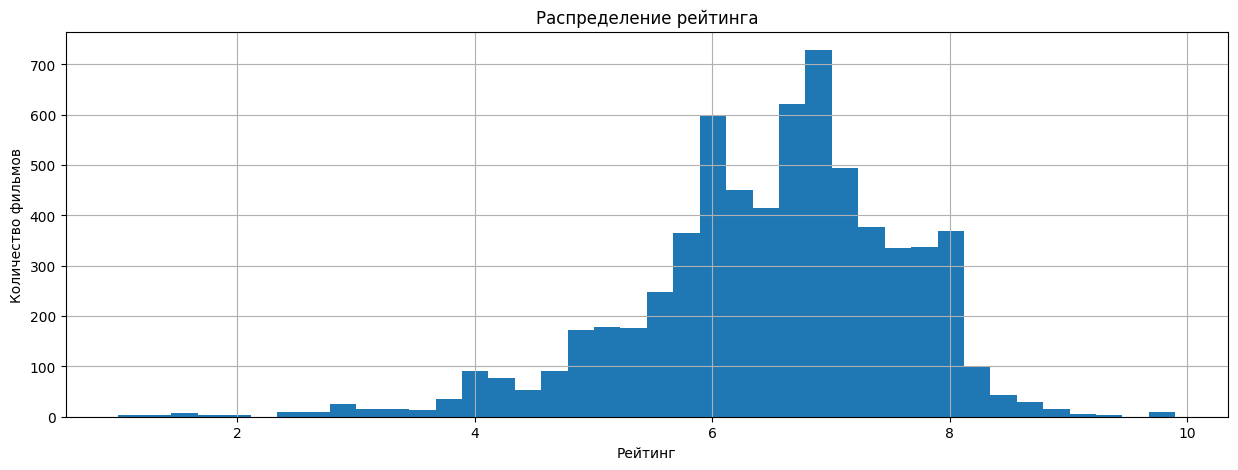

In [60]:
# построим гистограмму для значений рейтинга
( 
    data['ratings'].hist(bins=40, figsize=(15, 5))
    .set( xlabel='Рейтинг', ylabel='Количество фильмов', title='Распределение рейтинга')
);

plt.show()

Рейтинг фильмов варьируется от 1 до 9.9. В половине случаев фильмы имеют рейтинг от 5.9 до 7.2. Среднее и медианное  значение рейтинга близки друг к другу и составляют соответственно 6.49 и 6.6.

In [61]:
# отсортируем данные о дате премьеры фильмов
data['show_start_date'].sort_values()

4455   2010-01-11 12:00:00
4331   2010-01-13 12:00:00
4465   2010-01-13 12:00:00
4408   2010-01-14 12:00:00
4333   2010-01-14 12:00:00
               ...        
7478   2019-12-26 12:00:00
7466   2019-12-27 12:00:00
7482   2019-12-28 12:00:00
7483   2019-12-30 12:00:00
7484   2019-12-30 12:00:00
Name: show_start_date, Length: 7485, dtype: datetime64[ns]

Датасет содержит данные с 11.01.2010 по 30.12.2019.

Посмотрим на данные о господдержке.

In [62]:
data['refundable_support'].sort_values().unique()

array([0.000000e+00, 3.500000e+06, 5.000000e+06, 7.000000e+06,
       7.153119e+06, 7.346881e+06, 8.000000e+06, 9.000000e+06,
       1.000000e+07, 1.500000e+07, 1.700000e+07, 1.900000e+07,
       2.000000e+07, 2.500000e+07, 2.600000e+07, 2.800000e+07,
       2.900000e+07, 3.000000e+07, 3.500000e+07, 3.600000e+07,
       3.800000e+07, 4.000000e+07, 4.100000e+07, 4.400000e+07,
       5.000000e+07, 5.500000e+07, 6.000000e+07, 7.500000e+07,
       8.000000e+07, 1.000000e+08, 1.100000e+08, 1.150000e+08,
       1.500000e+08, 1.800000e+08,          nan])

In [63]:
# вспомогательная функция, для отображения сумм на оси в млрд
def billions(x, pos):
    """Функция возвращает число, деленное на миллиард,
    с точностью одной цифры до запятой и одной после,
    оформленное строкой с указанием единиц измерения.
    """
    return f'{x*1e-9:1.1f} млрд'

In [64]:
# вспомогательная функция, для отображения сумм на оси в млн
def millions(x, pos):
    """Функция возвращает число, деленное на миллион,
    с точностью одной цифры до запятой и одной после,
    оформленное строкой с указанием единиц измерения.
    """
    return f'{x*1e-6:1.1f} млн'

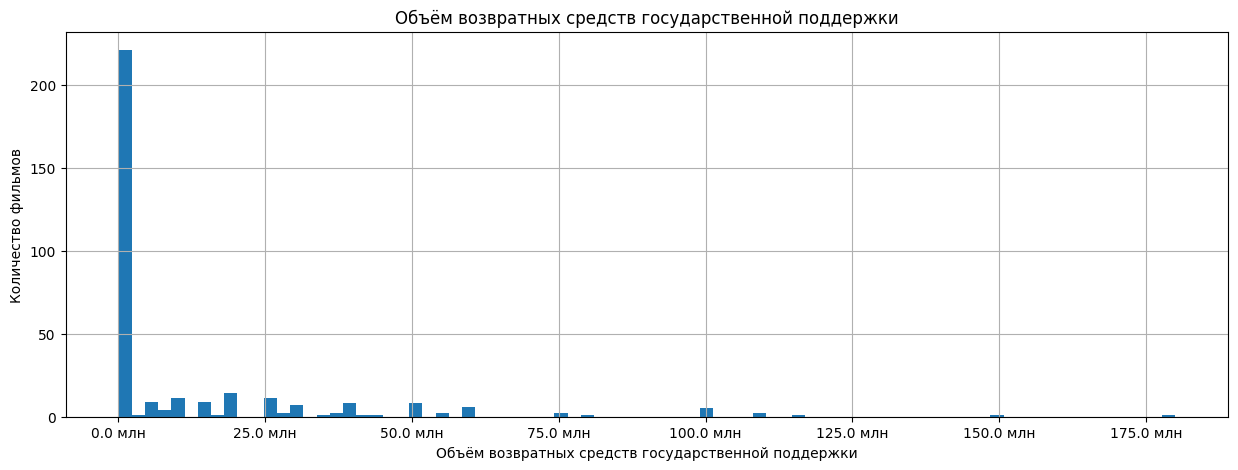

In [65]:
# построим гистограмму для refundable_support
(
    data['refundable_support'].plot(
        kind='hist', bins=80, grid=True, figsize=(15, 5),
        title='Объём возвратных средств государственной поддержки')
    .set(xlabel='Объём возвратных средств государственной поддержки', ylabel='Количество фильмов')
)
plt.gca().get_xaxis().set_major_formatter(millions)

In [66]:
data['nonrefundable_support'].sort_values().unique()

array([0.00000000e+00, 3.00000000e+06, 4.70000000e+06, 5.00000000e+06,
       5.30000000e+06, 6.00000000e+06, 8.00000000e+06, 1.00000000e+07,
       1.15200000e+07, 1.50000000e+07, 2.00000000e+07, 2.01452850e+07,
       2.17000000e+07, 2.29040000e+07, 2.30000000e+07, 2.40000000e+07,
       2.44500000e+07, 2.45000000e+07, 2.49860000e+07, 2.50000000e+07,
       2.52000000e+07, 2.53450000e+07, 2.55000000e+07, 2.59000000e+07,
       2.60000000e+07, 2.65000000e+07, 2.69500000e+07, 2.70000000e+07,
       2.75000000e+07, 2.75100000e+07, 2.80000000e+07, 2.85000000e+07,
       2.90000000e+07, 3.00000000e+07, 3.01239150e+07, 3.10000000e+07,
       3.40000000e+07, 3.50000000e+07, 3.70000000e+07, 4.00000000e+07,
       4.15000000e+07, 4.50000000e+07, 4.65022990e+07, 5.00000000e+07,
       5.00008660e+07, 5.10000000e+07, 5.50000000e+07, 5.65790550e+07,
       5.90000000e+07, 6.00000000e+07, 6.40000000e+07, 7.00000000e+07,
       7.50000000e+07, 8.00000000e+07, 8.50000000e+07, 9.00000000e+07,
      

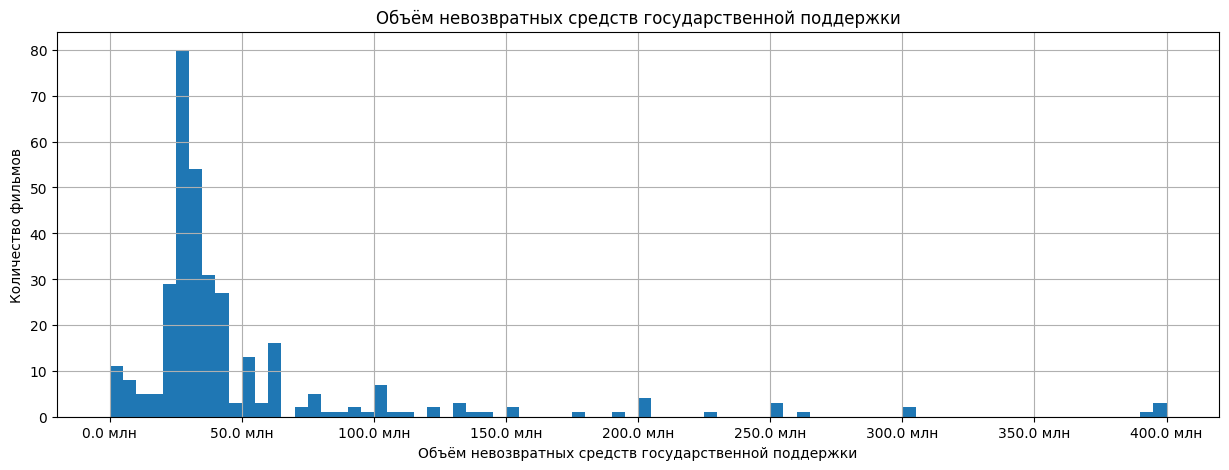

In [67]:
# построим гистограмму для nonrefundable_support
(
    data['nonrefundable_support'].plot(
        kind='hist', bins=80, grid=True, figsize=(15, 5),
        title='Объём невозвратных средств государственной поддержки')
    .set(xlabel='Объём невозвратных средств государственной поддержки', ylabel='Количество фильмов')
)
plt.gca().get_xaxis().set_major_formatter(millions)

In [68]:
data['budget'].sort_values().unique()

array([0.00000000e+00, 1.44624640e+07, 1.50100000e+07, 1.81664180e+07,
       1.87060800e+07, 2.70000000e+07, 2.81155800e+07, 2.85714290e+07,
       3.00000000e+07, 3.04489110e+07, 3.08000000e+07, 3.13053130e+07,
       3.30000000e+07, 3.50000000e+07, 3.52969500e+07, 3.57142860e+07,
       3.57600600e+07, 3.60162690e+07, 3.62595000e+07, 3.70009900e+07,
       3.71428570e+07, 3.73712620e+07, 3.74247960e+07, 3.75000000e+07,
       3.76000000e+07, 3.77442800e+07, 3.77656540e+07, 3.78491030e+07,
       3.78787870e+07, 3.78891650e+07, 3.79436520e+07, 3.80000000e+07,
       3.84400000e+07, 3.84615380e+07, 3.84667000e+07, 3.84768690e+07,
       3.85000000e+07, 3.88582600e+07, 3.90000000e+07, 3.90579710e+07,
       3.91292890e+07, 3.97000000e+07, 3.99900000e+07, 4.00000000e+07,
       4.00151220e+07, 4.02650000e+07, 4.02877700e+07, 4.05000000e+07,
       4.05741400e+07, 4.06008000e+07, 4.10000000e+07, 4.14978600e+07,
       4.19989840e+07, 4.20000000e+07, 4.22525090e+07, 4.28600000e+07,
      

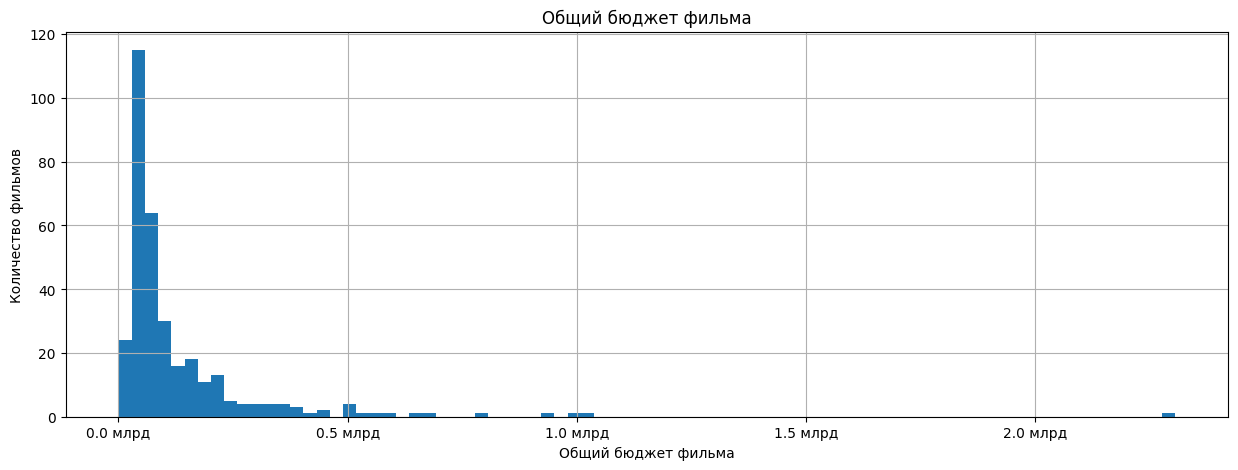

In [69]:
# построим гистограмму для budget
(
    data['budget'].plot(
        kind='hist', bins=80, grid=True, figsize=(15, 5),
        title='Общий бюджет фильма')
    .set(xlabel='Общий бюджет фильма', ylabel='Количество фильмов')
)
plt.gca().get_xaxis().set_major_formatter(billions)

Все значения, обозначающие денежные суммы, принимают значения от 0 и больше. Распределения имеют длинные «хвосты» в положительную сторону. Большой разброс значений от минимума до максимума в данных о господдержке, а также сильно различающиеся значения медианы и среднего говорят о разнообразии данных и наличии экстремально больших значений. Для объема средств господдержки значение 0 вполне приемлимо. С учетом специфики отрасли, появление значений, намного превышающих остальные, не вызывает вопросов. Например, если картина была успешной, вполне могли увеличить бюджет (и сумму господдержки) на выпуск продолжения.

Из описания данных известно, что столбец `budget` уже включает в себя полный объём государственной поддержки. Бюджет не обязательно должен полность равняться оказанной финансовой помощи, однако не может быть меньше нее. Проверим, сколько у нас таких записей.

In [70]:
# количество записей, для которых бюджет не na
data[data['budget'].notna()].shape[0]

332

In [71]:
data[(data['budget'].notna()) & (data['budget'] < data['nonrefundable_support'] + data['refundable_support'])]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО КИНОСТУДИЯ ""СЕНТЯБРЬ""",Россия,А.ЗАЙЦЕВ,"О.ГРАНИНА, А.ЗАЙЦЕВ",«16+»,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,ДУXLESS 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""КИНОСТУДИЯ ""СЛОВО"",ООО ""АРТ ПИКЧЕРС СТУДИЯ""",Россия,Р.ПРЫГУНОВ,"П.АНУРОВ, Ф.БОНДАРЧУК, Д.РУДОВСКИЙ",«16+»,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,ВОИН (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""ФОРПОСТ ПРОДАКШН"",ООО ""АРТ ПИКЧЕРС СТУДИЯ""",Россия,А.АНДРИАНОВ,"ООО ""АРТ ПИКЧЕРС СТУДИЯ""",«12+»,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,БАРМЕН.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВАЙТ МЕДИА"",ООО ""АРТ ПИКЧЕРС СТУДИЯ""",Россия,Д.ШТУРМАНОВА,Т.ВАЙНШТЕЙН,«16+»,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,САВВА. СЕРДЦЕ ВОИНА,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""ГЛЮКОЗА ПРОДАКШН"",ООО ""АРТ ПИКЧЕРС СТУДИЯ""",Россия,М.ФАДЕЕВ,А.ЧИСТЯКОВ,«6+»,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,ТРЯПИЧНЫЙ СОЮЗ,111010215,2015-06-08 12:00:00,Художественный,"ООО ""КИНОКОМПАНИЯ ""КОКТЕБЕЛЬ""",Россия,М.МЕСТЕЦКИЙ,"Р.БОРИСЕВИЧ, А.КУШАЕВ",«18+»,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,СРОЧНО ВЫЙДУ ЗАМУЖ,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВАЙТ МЕДИА"",ООО ""АРТ ПИКЧЕРС СТУДИЯ""",Россия,С ЧЕКАЛОВ,"Ф.БОНДАРЧУК, Т.ВАЙНШТЕЙН, Д.РУДОВСКИЙ",«16+»,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,ПОМНЮ - НЕ ПОМНЮ!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КИНОФИРМА""",Россия,В.РОВЕНСКИЙ,"ООО ""КИНОФИРМА""",«12+»,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,ЛЮБОВЬ С ОГРАНИЧЕНИЯМИ,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВАЙТ МЕДИА"",ООО ""АРТ ПИКЧЕРС СТУДИЯ""",Россия,Д.ТЮРИН,"Ф.БОНДАРЧУК, Т.ВАЙНШТЕЙН, Д.РУДОВСКИЙ",«16+»,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,ПРИТЯЖЕНИЕ (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""ВОДОРОД 2011"",ООО ""АРТ ПИКЧЕРС СТУДИЯ""",Россия,Ф.БОНДАРЧУК,"ООО ""АРТ ПИКЧЕРС СТУДИЯ""",«12+»,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


In [72]:
# вычислим процент таких записей от общего числа фильмов, получивших господдержку
(
    data[(data['budget'].notna()) & ((data['nonrefundable_support'] + data['refundable_support'])/data['budget'] > 1)]
    .shape[0]/data[data['budget'].notna()].shape[0]
)

0.05120481927710843

Потеря 5% данных из фильмых, по которым есть данные о господдержке (с учетом небольшого их количества) может повлиять на результаты. Во всех случаях в колонке значение 0. Поищем ,чем мы можем его заполнить.

Посмотрим, какой процент от бюджета обычно составляет господдержка. Добавим столбец `share_of_support` в таблицу, в котором будем хранить процент господдержки от общего бюджета.

In [73]:
data['share_of_support'] = (data['nonrefundable_support'] + data['refundable_support'])/data['budget']

Проверим, сильно изменялся процент в зависимости от года.

In [74]:
(
    data
    .query('budget > (refundable_support + nonrefundable_support)')
    .groupby(data['show_start_date'].dt.year)['share_of_support']
    .agg(['median', 'count'])
    .style.format({'median':'{:.2f}'})
)

,median,count
show_start_date,,
2013,0.47,2
2014,0.54,15
2015,0.61,80
2016,0.64,58
2017,0.48,39
2018,0.56,52
2019,0.58,69


In [75]:
# найдем медианное значение по выборке в целом для фильмов, чей бюджет указан корректно
share_of_support_median = data.query('budget > (refundable_support + nonrefundable_support)')['share_of_support'].median()
share_of_support_median

0.5922645480995804

Выборка очень маленького размера, количество фильмов, получивших поддержку за каждый год очень отличается. Более правильным выглядит использовать медианное значение по выборке в целом для фильмов, чей бюджет указан корректно, для исправления некорректных значений. 

In [76]:
data.loc[(data['budget'].notna()) & (data['budget'] < data['nonrefundable_support'] + data['refundable_support']),\
         'budget'] = (data['nonrefundable_support'] + data['refundable_support']) / share_of_support_median

Нужно обновить столбец 'share_of_support', т.к. предыдущие значения были вычислены для некоторых строк с использованием некорректного значения бюджета.

In [77]:
data['share_of_support'] = (data['nonrefundable_support'] + data['refundable_support'])/data['budget']

Убедимся, что все значения в столбце корректны.

In [78]:
data.query('share_of_support > 1 or share_of_support < 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,share_of_support


На данном этапе с учетом специфики выборки и того, что число фильмов, получивших господдержку, небольшое (данных для анализа этой категории не так много), экстремальные значения для сумм не удаляем.

In [79]:
# величина кассовых сборов
data['box_office'].sort_values().value_counts()

box_office
0.00                24
200.00              13
300.00              12
360.00               9
500.00               8
                    ..
1,012,749.00         1
1,012,970.51         1
1,015,408.50         1
1,015,431.51         1
3,073,568,690.79     1
Name: count, Length: 2938, dtype: int64

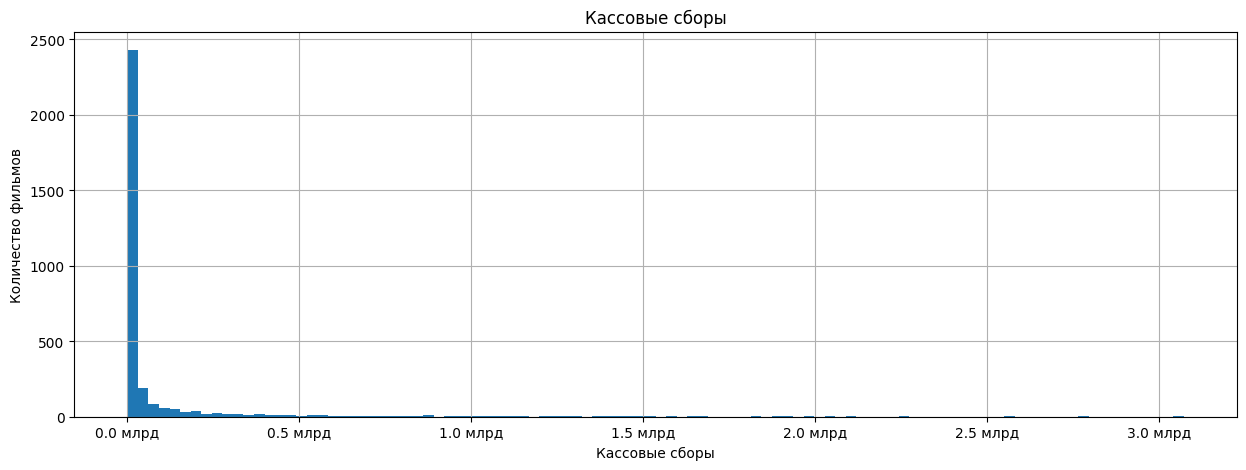

In [80]:
# построим гистограмму для box_office
(
    data['box_office'].plot(
        kind='hist', bins=100, grid=True, figsize=(15, 5),
        title='Кассовые сборы')
    .set(xlabel='Кассовые сборы', ylabel='Количество фильмов')
)
plt.gca().get_xaxis().set_major_formatter(billions)

Среднее значение кассовых сборов превышает медианное в десятки раз. Это говорит о наличии экстремально больших значений сборов (видимо, в выборке есть данные о блокбастерах и лидерах проката). Крайне малые значения кассовых сборов выглядят странно, но вполне могут быть (в случае полного провала фильма, либо  фильм изначально не рассчитан на широкую аудиторию). Вместе с тем нулевые значения похожи на ошибочные данные. Заменим их на na, чтобы при анализе динамики проката было меньше неточности в вычислениях.

In [81]:
data.loc[data['box_office'] == 0, 'box_office'] = np.nan

<a name="добавление-вспомогательных-столбцов"></a>
#### Создание новых столбцов

Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [82]:
data['show_start_date_year'] = pd.DatetimeIndex(data['show_start_date']).year

Добавим еще два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Выше мы уже рассматривали уникальные значения столбца с жанрами, все значения были разделены запятыми. Проверим списки главных режиссеров, возможно они, как и страны, иногда разделены дефисом.

In [83]:
data[(data['director'].notna()) & (data['director'].str.contains('-'))]['director'].unique()

array(['ЖАН-ПЬЕР ЖЕНЕ', 'А.МИХАЛКОВ-КОНЧАЛОВСКИЙ', 'СОН-ЮН О',
       'ЖАН-МАРК ВАЛЛИ', 'САНГ-ХАН ХО', 'ЖАН-ЖАК АННО',
       'ЖАН-ЖАК МАНТЕЛЛО', 'ЖАН-ПЬЕР ДАРДЕНН, ЛЮК ДАРДЕНН',
       'ЭД ГАСС-ДОНЕЛЛИ', 'ПАСКАЛЬ АРНОЛЬД, ЖАН-МАРК БАРР', 'САН-СУ ХОН',
       'КИМ КИ-ДУК', 'ШАРЛЬ ОЛИВЬЕ-МИШО', 'ДЖОН КАФКА, ЮН-СОК ЧХВЕ',
       'ВАЛЕРИЯ БРУНИ-ТЕДЕСКИ', 'ОЛИВЕР ЖАН-МАРИ', 'ДЖОЗЕФ ГОРДОН-ЛЕВИТТ',
       'ПЬЕР-ФРАНСУА МАРТЕН-ЛАВАЛЬ',
       'ИССАРА НАДИ, КИРАТИ НАК-ИНТАНОН, ПАТЧАНОН ТУМДЖИРА',
       'МЭТТ БЕТТИНЕЛЛИ-ОЛЬПИН, ТАЙЛЕР ДЖИЛЛЕТТ', 'С.ОЛЬДЕНБУРГ-СВИНЦОВ',
       'ХАУМЕ КОЛЬЕТ-СЕРРА', 'ЖАН-МАРК ВАЛЛЕ', 'КИРАН ДАРСИ-СМИТ',
       'АРНО ЛАРЬЁ, ЖАН-МАРИ ЛАРЬЁ', 'ДЖОННИ ТО, СИУ-ТУНГ ЧИНГ',
       'ЖАН-МАРК РУДНИЦКИЙ', 'РЕМИ БЕЗАНСОН, ЖАН-КРИСТОФ ЛИ',
       'ЖАН-ПОЛЬ ЛИЛИЕНФЕЛЬД', 'ЗАНДОР ЙЕССЕ, УТЕ ФОН МЮНХОВ-ПОЛЬ',
       'МАРТИН МИЭ-РЕНАР', 'ДЖОРДАН ВОГТ-РОБЕРТС',
       'ХАЛЛВАР ВИТЗО, ГАЭЛЬ ДЕНИС, ПЕТРА ЖОКСА, ДЕЯ КУЛУМБЕГАШВИЛИ, СЕРГЕЙ ПИКАЛОВ, АННА СОФИЯ СИЛЬВЕРСТЕЙН, СИМОН МЕ

Похоже, случаев разделения фамилий разных режиссеров дефисом нет. 

In [84]:
# выведем количество  фильмов, для которых не указан режиссер
data['director'].isna().sum()

9

In [85]:
def create_main_column(data, list_of_columns):
    """
    Создает новые столбцы, извлекая первое значение из каждого элемента указанных столбцов.

    Функция принимает DataFrame и список столбцов, содержащих строки с перечислением значений через запятую.
    Для каждого столбца из списка создается новый столбец с суффиксом '_main', содержащий только первое значение
    из исходной строки (до первой запятой). Пропущенные значения (NaN) остаются без изменений.

    Параметры:
        data (pd.DataFrame): Исходный DataFrame с данными.
        list_of_columns (list): Список строковых названий столбцов, которые нужно обработать.

    Возвращает:
        pd.DataFrame: Модифицированный DataFrame с добавленными новыми столбцами.
        
    """
    for column in list_of_columns:
        data[f'{column}_main'] = data[column].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else x)
    return data

In [86]:
data = create_main_column(data, list_of_columns=['director', 'genres'])

Проверим результат работы функции.

In [87]:
data[['pu_number', 'genres', 'genres_main', 'director', 'director_main']].head(20)

,pu_number,genres,genres_main,director,director_main
0,221048915,"боевик,драма,мелодрама",боевик,КЕВИН КОСТНЕР,КЕВИН КОСТНЕР
1,111013716,"драма,военный",драма,Е.МАТВЕЕВ,Е.МАТВЕЕВ
2,221038416,"фантастика,боевик,триллер",фантастика,ТИМУР БЕКМАМБЕТОВ,ТИМУР БЕКМАМБЕТОВ
3,221026916,"фантастика,боевик,триллер",фантастика,ТИМУР БЕКМАМБЕТОВ,ТИМУР БЕКМАМБЕТОВ
4,221030815,"фантастика,боевик,триллер",фантастика,ТИМУР БЕКМАМБЕТОВ,ТИМУР БЕКМАМБЕТОВ
5,111013816,драма,драма,В.АБДРАШИТОВ,В.АБДРАШИТОВ
6,111007013,"мелодрама,комедия",мелодрама,В.МЕНЬШОВ,В.МЕНЬШОВ
7,221074614,"мюзикл,мелодрама,комедия",мюзикл,ДЖОН ТУРТУРРО,ДЖОН ТУРТУРРО
8,121011416,"комедия,криминал",комедия,ЭРИК БЕСНАРД,ЭРИК БЕСНАРД
9,111019114,"мелодрама,комедия",мелодрама,В.ТИТОВ,В.ТИТОВ


Также ранее мы добавили столбец `share_of_support`, содержащий данные о доле государственной поддержки от общего бюджета фильма.

Повторим поиск дубликатов.

In [88]:
data.duplicated().sum()

0

In [89]:
data[data.duplicated(['pu_number', 'title', 'director'],  keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,share_of_support,show_start_date_year,director_main,genres_main


С учетом того, что мы исследуем данные о российском кинопрокате, для дальнейшего анализа добавим еще один столбец `film_country_category`, в котором укажем 'российское' (если страна производства Россия), 'иное' (во всех других случаях, в.т. числе если Россия - одна из стран в списке).

In [90]:
data['film_country_category'] = data['production_country'].apply(lambda x: 'российское' if  x == 'Россия' else 'иное')

In [91]:
data.tail(12)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,share_of_support,show_start_date_year,director_main,genres_main,film_country_category
7473,ВТОРЖЕНИЕ,111022519,2019-12-23 12:00:00,Художественный,"ООО ""АРТ ПИКЧЕРС СТУДИЯ"",ООО ""ВОДОРОД 2011""",Россия,Ф.БОНДАРЧУК,"Ф.БОНДАРЧУК, М.ВРУБЕЛЬ, А.АНДРЮЩЕНКО, Д.РУДОВСКИЙ",«12+»,"100,000,000.00",...,"944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN,0.53,2019,Ф.БОНДАРЧУК,фантастика,российское
7474,ПАПА,111022919,2019-12-24 12:00:00,Художественный,"ООО ""КИНОШКОЛА ИМЕНИ СЕРГЕЯ ФЕДОРОВИЧА БОНДАРЧ...",Россия,К.ЧУВИКОВА,"ООО ""КИНОШКОЛА ИМЕНИ СЕРГЕЯ ФЕДОРОВИЧА БОНДАРЧ...",«18+»,NaN,...,NaN,NaN,8.20,драма,NaN,NaN,2019,К.ЧУВИКОВА,драма,российское
7475,Я СВОБОДЕН,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""КИНОСТУДИЯ ИМ. М.ГОРЬКОГО""",Россия,И.СЕВЕРОВ,С.ЗЕРНОВ,«12+»,0.00,...,"46,154,000.00",Министерство культуры,5.90,драма,NaN,0.65,2019,И.СЕВЕРОВ,драма,российское
7476,ТРИДЦАТЬ,121038419,2019-12-26 12:00:00,Художественный,ДЕМНЕХСТ АУФ ВИДЕО,Германия,СИМОНА КОСТОВА,ДЖЕЙЛАН АТАМАН-ДЖЕКА,«16+»,NaN,...,NaN,NaN,6.30,драма,NaN,NaN,2019,СИМОНА КОСТОВА,драма,иное
7477,(НЕ)ИДЕАЛЬНЫЙ МУЖЧИНА,111023119,2019-12-24 12:00:00,Художественный,"ООО ""НОН-СТОП ПРОДАКШН""",Россия,М.БАЛЬЧЮНАС (ПСЕВДОНИМ М.ВАЙСБЕРГ),"С.МЕЛЬКУМОВ, А.РОДНЯНСКИЙ, М.ВАЙСБЕРГ, Р.МИНАС...",«12+»,"40,000,000.00",...,"150,147,502.00",Фонд кино,4.50,"комедия,фантастика,мелодрама",NaN,0.67,2019,М.БАЛЬЧЮНАС (ПСЕВДОНИМ М.ВАЙСБЕРГ),комедия,российское
7478,ЭКОЛАВ,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.ГРИГОРЬЕВ,ВГИК,«18+»,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,Д.ГРИГОРЬЕВ,NaN,российское
7479,АКРАМ ХАН: РОДОМ ИЗ КАРРИ ХАУСА,126007919,2019-12-23 12:00:00,Прочие,СВОН ФИЛМЗ,Великобритания,НИК ПОЙНЦ,"ПОППИ БЕГУМ, НИК ПОЙНЦ",«12+»,NaN,...,NaN,NaN,NaN,NaN,"219,569.00",NaN,2019,НИК ПОЙНЦ,NaN,иное
7480,САД ХУДОЖНИКА: АМЕРИКАНСКИЙ ИМПРЕССИОНИЗМ,126008019,2019-12-23 12:00:00,Прочие,СЕВЕН АРТС ПРОДАКШНЗ,Великобритания,ФИЛ ГРАБСКИ,ФИЛ ГРАБСКИ,«12+»,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,ФИЛ ГРАБСКИ,NaN,иное
7481,ЗВЕРИНАЯ ЯРОСТЬ,121037819,2019-12-24 12:00:00,Художественный,"ДЭНИЕЛ ГРОДНИК ПРОДАКШНЗ,ВАНДЕРФИЛМ МЕДИА КОРП...",США,НИК ПАУЭЛЛ,"ДЖЕФФ БОУЛЕР, ДЭНИЭЛ ГРОДНИК, ЛУИЛЬО РУИС, БРЭ...",«16+»,NaN,...,NaN,NaN,5.40,"боевик,триллер",NaN,NaN,2019,НИК ПАУЭЛЛ,боевик,иное
7482,ЩЕНЯЧИЙ ПАТРУЛЬ: СКОРЕЙ СПЕШИМ НА ПОМОЩЬ!,124010819,2019-12-28 12:00:00,Художественный,"НИКЕЛОДЕОН АНИМЕЙШН СТУДИОС,СПИН МАСТЕР","США,Канада",ЧАРЛЬЗ Е.БАСТЬЕН,ДЖЕННИФЕР ДОДЖ,«0+»,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,ЧАРЛЬЗ Е.БАСТЬЕН,NaN,иное


<a  name="промежуточный-вывод-2"></a>
__Промежуточный вывод__:
- Преобразовали тип данных для столбцов `show_start_date` в datetime, `ratings` в float.
- Большое количество пропусков в данных о государственном финансировании (столбцы `budget`, `financing_source`, `refundable_support`, `nonrefundable_support`) вызвано особенностями выборки (большую часть составляют фильмы, не получавшие государственного финансирования).
- Более чем для половины фильмов отсутствуют данные о кассовых сборах (возможно, причиной является человеческий фактор:  информация была предоставлена некорректно, несвоевременно, не была учтена в итоговых отчетах, не предоставлялась вовсе).
- Отсутствующая информация о рейтинге фильма на КиноПоиске может быть обусловлена тем, что рейтинг пока что не был сформирован.
- Пропуски в данных о жанре, продюсере, режиссере, студии и стране производства фильма также могли быть вызваны человеческим фактором.
- Найти логичную замену пропускам не удалось.
- Явные дубликаты отсутствуют. Дубликаты по ключевым параметрам (номеру прокатного удостоверения, названию и режиссеру) также не найдены. 
- Практически для всех категориальных столбцов выявлена общая проблема - несогласованное форматирование значений. Наличие лишних или некорректно расставленных пробелов вокруг значений, использование различных разделителей (запятая, дефис) для разбивки списка значений затрудняют категоризацию.
- Записали прописными буквами названия фильмов, студий, имена режиссеров и продюсеров. Удалили пробелы в начале и конце значений категориальных переменных, осуществили замену "ё" на "е". Исправили ошибки в названиях стран, записали их через запятую без пробелов. Значения `film_studio` записали через запятую без пробелов. 
- Для удобного представления информации о возрастных ограничениях сократили возрастную категорию до значения возраста в кавычках.
- Значения в столбце `ratings` приведены к одному виду - дробные числа до 10. Заменили некорректные значения бюджета на медианное значение по выборке для фильмов, чей бюджет указан корректно.
- Добавили новые столбцы: информация о годе проката `show_start_date_year`, главном режиссере (первом из списка режиссеров) `director_main`, основном жанре (первом из списка жанров) `genres_main`, данные о доле государственной поддержки от общего бюджета фильма `share_of_support`, категория фильма в зависимости от страны производства `film_country_category`('российское' (если страна производства Россия), 'иное'(в остальных случаях)).

<a name='исследовательский-анализ-данных'></a>
### Исследовательский анализ данных


<a name = 'количество-фильмов-по-годам'></a>
#### Анализ кинопроката по годам

Фильмы, по которым есть информация о прокате в кинотеатрах, от остальных отличаются наличием данных в колонке 'box_office'. Выделим эту часть выборки для анализа. Определим количество таких записей.

In [92]:
data_with_box_office = data[data['box_office'].notna()]
data_with_box_office.shape[0]

3134

В связи с тем, что один и тот же фильм может иметь несколько прокатных удостоверений, подготовим данные для проведения этого анализа. Чтобы не считать один фильм, вышедший в течение года с несколькими прокатными удостоверениями, несколько раз, попробуем оставить только по одному из таких фильмов. Будем считать, что фильм повторяется, при совпадении названия, главного режиссера, страны-производства, года показа фильма), __для данного этапа анализа__ он является __дубликатом__ (анализируем именно количество фильмов).

In [93]:
# посмотрим на дубликаты
(
    data[data.duplicated(['title', 'director_main', 'production_country', 'show_start_date_year'], keep=False)]
    .sort_values(by=['title', 'director'])
)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,share_of_support,show_start_date_year,director_main,genres_main,film_country_category
4851,127 ЧАСОВ,121000811,2011-01-27 12:00:00,Художественный,"ФОКС СЕРЧЛАЙТ ПИКЧЕРЗ,КЛОД ЭЙТ ФИЛМЗ,ФИЛМ ФО,Э...","США,Великобритания",ДЭННИ БОЙЛ,"БЕРНАРД БЕЛЛЬЮ, ТЕССА РОСС, ГАРРЕТ СМИТ",«16+»,NaN,...,NaN,NaN,7.70,"триллер,биография,драма",NaN,NaN,2011,ДЭННИ БОЙЛ,триллер,иное
5057,127 ЧАСОВ,221069011,2011-05-18 12:00:00,Художественный,"ФОКС СЕРЧЛАЙТ ПИКЧЕРЗ,КЛОД ЭЙТ ФИЛМЗ,ФИЛМ ФО,Э...","США,Великобритания",ДЭННИ БОЙЛ,"БЕРНАРД БЕЛЛЬЮ, ТЕССА РОСС, ГАРРЕТ СМИТ",«16+»,NaN,...,NaN,NaN,7.70,"триллер,биография,драма",NaN,NaN,2011,ДЭННИ БОЙЛ,триллер,иное
3128,13 ЧАСОВ: ТАЙНЫЕ СОЛДАТЫ БЕНГАЗИ,221019616,2016-04-19 12:00:00,Художественный,"ПАРАМАУНТ,ДАН ФИЛМЗ,ЛАТИНА ПИКЧАРЗ,3 АРТ ИНТЕР...",США,МАЙКЛ БЭЙ,"МАЙКЛ БЭЙ, ЭРВИН СТОФФ",«18+»,NaN,...,NaN,NaN,6.70,"боевик,триллер,драма",NaN,NaN,2016,МАЙКЛ БЭЙ,боевик,иное
3129,13 ЧАСОВ: ТАЙНЫЕ СОЛДАТЫ БЕНГАЗИ,121001016,2016-01-15 12:00:00,Художественный,"ПАРАМАУНТ,ДАН ФИЛМЗ,ЛАТИНА ПИКЧАРЗ,3 АРТ ИНТЕР...",США,МАЙКЛ БЭЙ,"МАЙКЛ БЭЙ, ЭРВИН СТОФФ",«18+»,NaN,...,NaN,NaN,6.70,"боевик,триллер,драма","18,439,240.55",NaN,2016,МАЙКЛ БЭЙ,боевик,иное
1493,13-Й РАЙОН: КИРПИЧНЫЕ ОСОБНЯКИ,221033314,2014-08-20 12:00:00,Художественный,"БРИК МЭНШЭНС ПРОДАКШНЗ,СИНЭ+ КАНАЛ+,Д8,ЕВРОПА ...","Франция,Канада",КАМИЛЬ ДЕЛАМАРР,"ЛЮК БЕССОН, КЛОД ЛЕЖЕ, ДЖОНАТАН ВЭНДЖЕР",«16+»,NaN,...,NaN,NaN,5.50,"боевик,криминал",NaN,NaN,2014,КАМИЛЬ ДЕЛАМАРР,боевик,иное
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,ЭТИМ УТРОМ В НЬЮ-ЙОРКЕ,121009614,2014-05-21 12:00:00,Художественный,"ЛЭНДСКЕЙП ИНТЕРТЕЙНМЕНТ,ФОРС МАЖОР,ПРОМИНЕНТ М...",США,ФИЛ ОЛДЕН РОБИНСОН,"БОБ КУПЕР, ТАЙЛЕР МИТЧЕЛЛ, ДЭНИЭЛ ДЖ. УОЛКЕР",«12+»,NaN,...,NaN,NaN,6.20,"драма,комедия",360.00,NaN,2014,ФИЛ ОЛДЕН РОБИНСОН,драма,иное
4070,Я НЕНАВИЖУ ДЕНЬ СВЯТОГО ВАЛЕНТИНА,121002010,2010-02-04 12:00:00,Художественный,"БЛЮ СТАР ПИКЧЕРЗ,АЙ ХЭЙТ ВДЭЙ ПРОДАКШНЗ,АЙ СИ ...",США,НИА ВАРДАЛОС,"ДОМИНИК ЙАННО, МЭДЛЕЙН ШЕРАК, УИЛЬЯМ ШЕРАК",«16+»,NaN,...,NaN,NaN,5.00,"мелодрама,комедия",NaN,NaN,2010,НИА ВАРДАЛОС,мелодрама,иное
4504,Я НЕНАВИЖУ ДЕНЬ СВЯТОГО ВАЛЕНТИНА,221139210,2010-12-03 12:00:00,Художественный,"БЛЮ СТАР ПИКЧЕРЗ,АЙ ХЭЙТ ВДЭЙ ПРОДАКШНЗ,АЙ СИ ...",США,НИА ВАРДАЛОС,"ДОМИНИК ЙАННО, МЭДЛЕЙН ШЕРАК, УИЛЬЯМ ШЕРАК",«16+»,NaN,...,NaN,NaN,5.00,"мелодрама,комедия",NaN,NaN,2010,НИА ВАРДАЛОС,мелодрама,иное
6378,ЯН АНТОНЫШЕВ,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.ОКОПНАЯ,Е.ГЕРАСИМОВ,«12+»,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,Е.ОКОПНАЯ,NaN,российское


Таких значений очень много - 702 из 7486. __Проверим__, как много данных о фильмах, у которых есть информация о прокате в кинотеатрах, мы потеряем, если будем оставлять первое или последнее значение.

In [94]:
# удалим дубликаты, оставим первую запись, получим долю оставшихся значений в датасете
filtred_data = data.drop_duplicates(['title', 'director_main', 'production_country', 'show_start_date_year'], keep= 'first')
filtred_data[filtred_data['box_office'].notna()].shape[0]/data_with_box_office.shape[0] # доля оставшихся значений

0.9779834077855776

In [95]:
# удалим дубликаты, оставим последнюю запись, получим долю оставшихся значений в датасете
filtred_data = data.drop_duplicates(['title', 'director_main', 'production_country', 'show_start_date_year'], keep= 'last')
filtred_data[filtred_data['box_office'].notna()].shape[0]/data_with_box_office.shape[0] # доля оставшихся значений

0.9821314613911933

Для данного пункта важно проводить анализ именно уникальных фильмов. Поэтому выбираем для себя способ, при котором сохраняем последнее вхождение, при нем сохраняется больше данных, содержащих информацию о прокате (98,2%). Значение filtred_data уже содержит подготовленные данные.

In [96]:
# обновим переменную после удаления дубликатов
data_with_box_office = filtred_data[filtred_data['box_office'].notna()]
data_with_box_office.shape[0]

3078

In [97]:
# определим размер выборки после удаления дубликатов для данного пункта анализа
filtred_data.shape[0]

7096

In [98]:
# размер исходной выборки
temp.shape[0]

7485

Для анализа остается 3078 из 3134 записей, содержащих информацию о прокате в кинотеатрах, всего - 7096 из 7485 после удаления дубликатов. Подготовим сводную таблицу о количестве фильмов.

In [99]:
data_cinema_release_every_year = (
    filtred_data
    .groupby('show_start_date_year')
    .agg(
        count_of_cinema_release=('box_office', 'count'),
        count_of_films=('box_office', lambda x: x.shape[0]),
        percent_of_cinema_release=('box_office', lambda x: 100*x.count()/x.shape[0]))
)
data_pivot_film_release_stat = (
    pd.concat(
        [data_cinema_release_every_year,
         # добавим строку с информацией за весь период
         pd.DataFrame(
             {'count_of_cinema_release': [filtred_data['box_office'].count()],
              'count_of_films': [filtred_data.shape[0]],
              'percent_of_cinema_release': [100*data_with_box_office.shape[0]/filtred_data.shape[0]]},
             index = ['TOTAL'])]
    )
)
(
    data_pivot_film_release_stat
    .style.format({'percent_of_cinema_release': '{:.2f}', 'count_of_films': '{:.0f}'})
    .set_caption('Информация о количестве фильмов, выходивших в прокат, по годам')
)

,count_of_cinema_release,count_of_films,percent_of_cinema_release
2010,78,818,9.54
2011,101,557,18.13
2012,116,556,20.86
2013,178,615,28.94
2014,268,765,35.03
2015,459,688,66.72
2016,517,782,66.11
2017,357,505,70.69
2018,474,884,53.62
2019,530,926,57.24


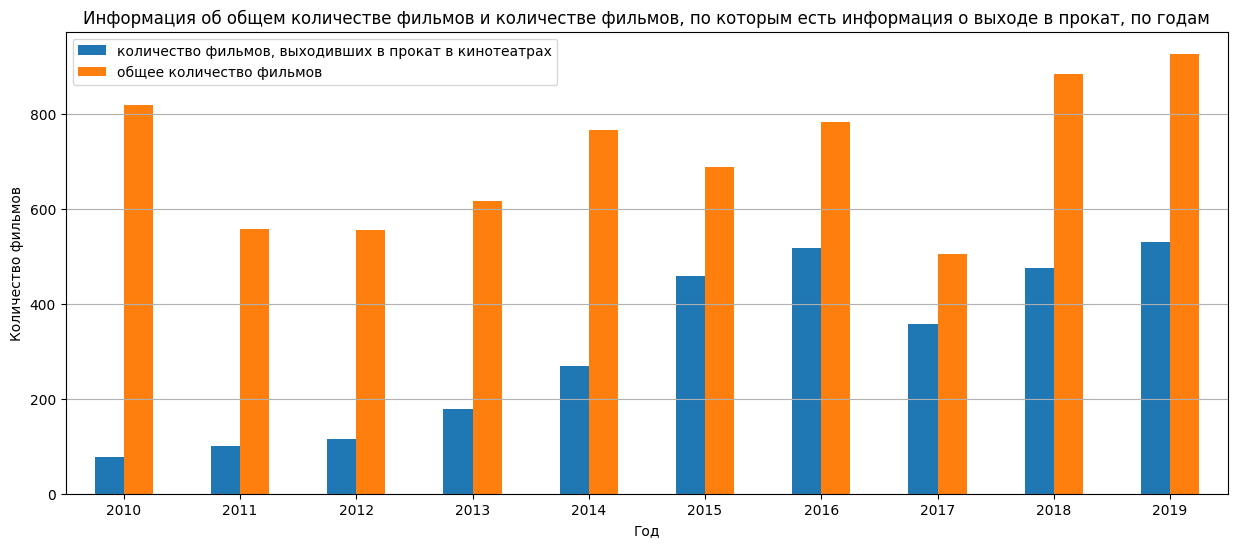

In [100]:
# построим гистограмму, отображающую распределение количества фильмов, выходивших в прокат, по годам
(
    data_cinema_release_every_year[['count_of_cinema_release', 'count_of_films']]
    .rename(
        columns = {
            'count_of_cinema_release': 'количество фильмов, выходивших в прокат в кинотеатрах',
            'count_of_films': 'общее количество фильмов'}
    )
    .plot(kind='bar', figsize=(15, 6), rot=0, grid=True,
          title='Информация об общем количестве фильмов и количестве фильмов, по которым есть информация о выходе в прокат, по годам',
          xlabel='Год', ylabel='Количество фильмов',
          legend=True
         )
    .grid(axis='x')
);

In [101]:
data_cinema_release_every_year.describe()

,count_of_cinema_release,count_of_films,percent_of_cinema_release
count,10.00,10.00,10.00
mean,307.80,709.60,42.69
std,181.61,147.37,22.77
min,78.00,505.00,9.54
25%,131.50,571.50,22.88
50%,312.50,726.50,44.33
75%,470.25,809.00,63.89
max,530.00,926.00,70.69


Фильмы, по которым есть информация о выходе в прокат, составляют 43.38% от выборки, есть данные за каждый год с 2010 по 2019. Много данных имеется за период 2015-2019 гг. (фильмы с указанной информацией о прокате в кинотеатрах составляют более 53% за год), однако полнее всего представлен период 2015-2017 (записей с информацией о прокате в кинотеатрах более 66%). Больше всего данных о выходе фильмов в прокат в кинотеатрах за 2017 год (70.69% от общего числа фильмов за год). Медианное значение количества фильмов, выпускаемых в прокат за год - 726, выпускаемых в прокат в кинотеатрах - 312.
> Можно предположить, что рост доли количества фильмов, для которых имеется информация о прокате в кинотеатрах, в 2015 году (с  35.03% до 66.72%) вызван следующим. ЕАИС внедрялась с 2010 года. Возможно, первые 3-5 лет заняло внедрение этой системы (регистрация демонстраторов фильмов, приобретение ими необходимых программно-аппаратных средств и решение других технических вопросов (кинотеатрам в городах до 100 тысяч жителей был поставлен срок до 1 января 2015 года, данные передавались не автоматизированным способом), введение ответственности кинотеатров за непредоставление информации). Похоже, что на рост количества внесенных данных в 2014-2015 годах повлияло подключение кинотеатров небольших городов и введение ответственности за непредоставление данных.

Посмотрим на данные о фильмах, по которым есть информация о кассовых сборах, в разрезе категории страны производства по годам.

In [102]:
# составим сводную таблицу
pivot_data_country_category = (
    data_with_box_office
    .groupby('show_start_date_year')
    .agg(
        russian=('film_country_category',lambda x: x[x.str.contains('российское')].count()),
        foreign=('film_country_category', lambda x: x[x.str.contains('иное')].count())
    ).rename_axis('Год проката')
)
pivot_data_country_category.columns= ['Российские фильмы', 'Фильмы, выпущенные в других странах']
pivot_data_country_category

,Российские фильмы,"Фильмы, выпущенные в других странах"
Год проката,,
2010,39,39
2011,43,58
2012,36,80
2013,49,129
2014,71,197
2015,126,333
2016,132,385
2017,52,305
2018,112,362


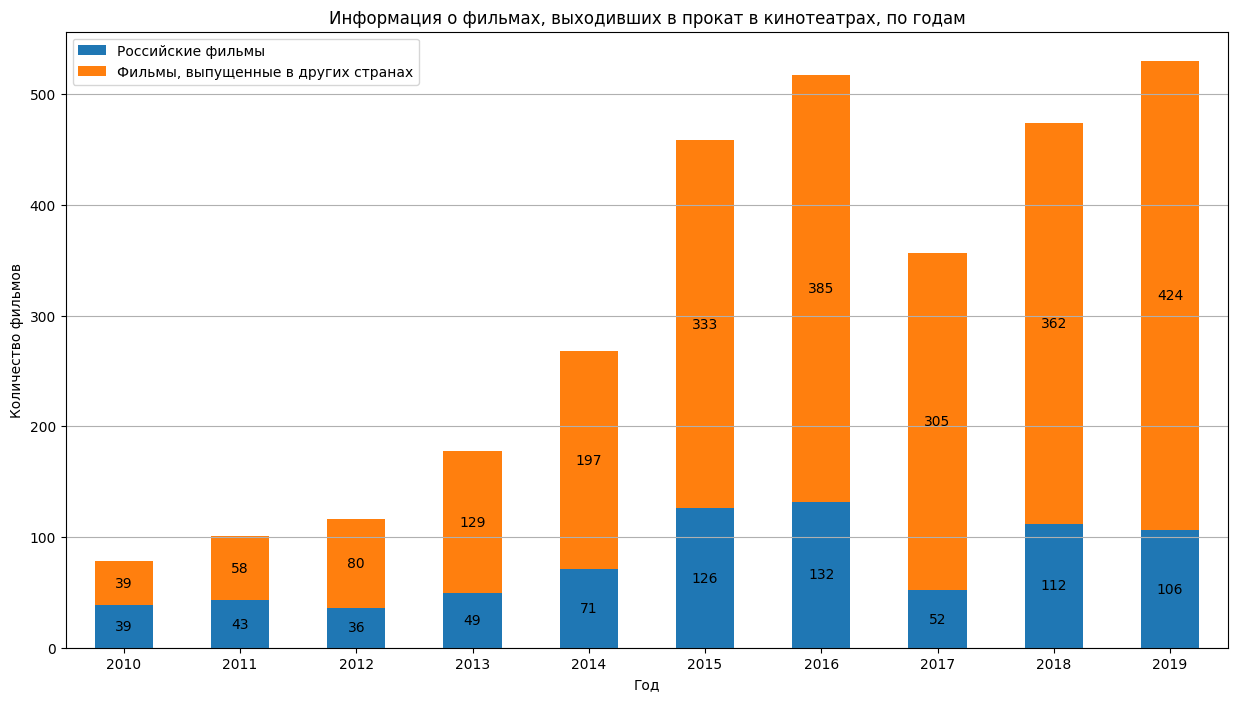

In [103]:
# построим график, отображающий количество фильмов каждой категории в зависимости от страны производства по годам
ax = pivot_data_country_category.plot(
        kind='bar', figsize=(15, 8), rot=0, grid=True, stacked=True,
        title='Информация о фильмах, выходивших в прокат в кинотеатрах, по годам',
        xlabel='Год', ylabel='Количество фильмов',
        legend=True
    )

# Добавление значений каждого столбца на график
ax.grid(axis='x')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(int(height), xy=(left+width/2, bottom+height/2),ha='center', va='center')

Как видно из сводной таблицы и графика, большую долю фильмов, по которым имеется информация о прокате в кинотеатрах, составляют фильмы, страной производства которых не является Россия, тенденции к изменению этого соотношения не наблюдается. Также стоит отметить, что в 2017 году наблюдалось снижение количества российских фильмов, вышедших в прокат в кинотеатрах.

<a name = 'динамика-проката'></a>
#### Динамика проката/суммы сборов по годам

Для данного этапа анализа используем выборку data_with_box_office, содержащую фильмы, по которым есть информация о прокате в кинотеатрах, т.к. мы анализируем сумму сборов (а не количество фильмов). 

In [104]:
# составим сводную таблицу
pivot_data_box_office =  (
    data_with_box_office
    .pivot_table(
        index='show_start_date_year',
        columns='film_country_category',
        values='box_office',
        aggfunc=['count', 'sum']
    )
)

# добавим общее число фильмов и общую сумму кассовых сборов по годам
pivot_data_box_office['total_count'] = \
pivot_data_box_office[('count', 'российское')] + pivot_data_box_office[('count', 'иное')]
pivot_data_box_office['total_sum'] =  \
pivot_data_box_office[('sum', 'российское')] + pivot_data_box_office[('sum', 'иное')]

# переименуем столбцы
pivot_data_box_office.rename(
    columns = {
        'count': 'количество фильмов', 'sum': 'кассовые сборы', 'total_count': 'общее количество фильмов',
        'total_sum': 'общие кассовые сборы'},
    inplace=True)

# выделим максимальные и минимальные значения в итоговых столбцах
(
    pivot_data_box_office
    .style
    .highlight_max(axis=0, color='lightgreen', subset=['общее количество фильмов', 'общие кассовые сборы']) # выделяем максимальные значения
    .highlight_min(axis=0, color='lightcoral', subset=['общее количество фильмов', 'общие кассовые сборы']) # выделяем минимальные значения
    .format("{:,.0f}")
)

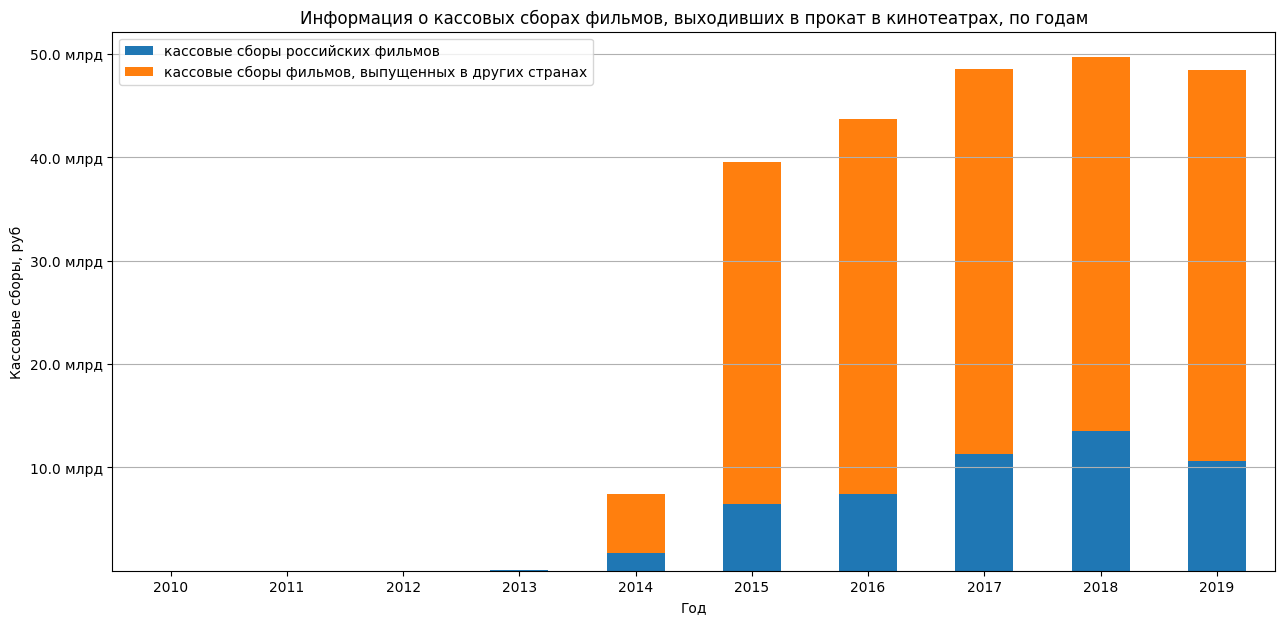

In [105]:
ax = pivot_data_box_office[[('кассовые сборы', 'российское'), ('кассовые сборы', 'иное')]].plot(
        kind='bar', figsize=(15, 7), rot=0, grid=True, stacked=True,
        title='Информация о кассовых сборах фильмов, выходивших в прокат в кинотеатрах, по годам',
        xlabel='Год', ylabel='Кассовые сборы, руб')
ax.legend(['кассовые сборы российских фильмов', 'кассовые сборы фильмов, выпущенных в других странах'])
ax.grid(axis='x')
plt.gca().get_yaxis().set_major_formatter(billions)

Несмотря на то, что больше всего записей о фильмах, вышедших в прокат в 2019 году, максимальная сумма сборов была достигнута в 2018 и составила 49 662 863 161 рубль. Меньше всего данных о кассовых сборах за 2010 год - всего о 78 фильмах, отсюда и наименьшая сумма кассовых сборов - 810 766 рублей. Правильнее будет рассмотреть период с 2015 по 2019 год, наименьшая сумма кассовых сборов за 2015 год - 39 497 356 036 рублей. 

Стоит отметь, что за период 2015 по 2018 наблюдался рост кассовых сборов российских фильмов, несмотря на снижение их количества в 2017 со 132 до 52. Суммарные кассовые сборы всех российских фильмов, вышедших в 2019 году, снизились. Кассовые сборы фильмов, выпущенных в других странах, растут, был временный спад в 2018 году.

In [106]:
# выведем топ-5 фильмов по кассовым сборам за 2017 год
(
    data_with_box_office[
        (data_with_box_office['show_start_date_year']==2017) & (data_with_box_office['film_country_category']=='российское')]
    .sort_values(by='box_office', ascending=False)
    .head().T
)

,5652,5504,5640,5658,5501
title,ДВИЖЕНИЕ ВВЕРХ,ПОСЛЕДНИЙ БОГАТЫРЬ,ЁЛКИ НОВЫЕ,ТРИ БОГАТЫРЯ И ПРИНЦЕССА ЕГИПТА,САЛЮТ-7
pu_number,111011817,111007017,111011617,114003317,111006917
show_start_date,2017-12-21 12:00:00,2017-10-19 12:00:00,2017-12-21 12:00:00,2017-12-21 12:00:00,2017-10-01 12:00:00
type,Художественный,Художественный,Художественный,Анимационный,Художественный
film_studio,"ООО ""СТУДИЯ ""ТРИТЭ"" НИКИТЫ МИХАЛКОВА""","ООО ""КИНОСТУДИЯ ""СЛОВО"" ПО ЗАКАЗУ ООО ""УОЛТ ДИ...","ООО ""ТАББАК""","ООО ""СТУДИЯ АНИМАЦИОННОГО КИНО ""МЕЛЬНИЦА""","ООО ""ЛЕМОН ФИЛМЗ СТУДИО"""
production_country,Россия,Россия,Россия,Россия,Россия
director,А.МЕГЕРДИЧЕВ,Д.ДЬЯЧЕНКО,"Д.КИСЕЛЕВ, А.ПЕРШИН (Ж.КРЫЖОВНИКОВ), А.КАРПИЛО...",К.ФЕОКТИСТОВ,К.ШИПЕНКО
producer,"Л.ВЕРЕЩАГИН, А.ЗЛАТОПОЛЬСКИЙ, Н.МИХАЛКОВ, ООО ...","Э.ИЛОЯН, Д.ЖАЛИНСКИЙ, М.ОЗКАН, А.ТРОЦЮК, В.ШЛЯППО","Т.БЕКМАМБЕТОВ, Г.СТРИЖЕВСКАЯ","С.СЕЛЬЯНОВ, А.БОЯРСКИЙ","С.СЕЛЬЯНОВ, Б.БАКУРАДЗЕ, А.ЗЛАТОПОЛЬСКИЙ"
age_restriction,«6+»,«12+»,«6+»,«6+»,«12+»
refundable_support,0.00,"50,000,000.00","50,000,000.00","50,000,000.00",0.00


Как мы видим, в топ-5 по кассовым сборам российских фильмов за 2017 год попали такие блокбастеры, как "Движение вверх" и "Последний богатырь" (согласно Википедии, занимают соответственно 7ое и 30е место в списке самых кассовых фильмов российского кинопроката с 2004 года, 5ое и 14ое в списке самых кассовых фильмов российского кинопроизводства). Это поспособствовало тому, что нет просадки по кассовым сборам за 2017 год для российских фильмов.

Продолжаем использовать выборку data_with_box_office, содержащую фильмы, по которым есть информация о прокате в кинотеатрах. Построим сводную таблицу, содержащую сведения о количестве фильмов, средней и медианной сумме сборов за год. 

In [107]:
# составим сводную таблицу 
pivot_data_box_office =  (
    data_with_box_office
    .pivot_table(
        index='show_start_date_year',
        values='box_office',
        aggfunc=['count', 'mean', 'median'])
)
pivot_data_box_office.columns = ['количество фильмов', 'средняя сумма сборов', 'медианная сумма сборов']

# выделим максимальные и минимальные значения в итоговых столбцах
(
    pivot_data_box_office
    .style
    # выделяем максимальные и минимальные значения
    .highlight_max(axis=0, color='lightgreen', subset=['средняя сумма сборов', 'медианная сумма сборов']) 
    .highlight_min(axis=0, color='lightcoral', subset=['средняя сумма сборов', 'медианная сумма сборов']) 
    .format({'средняя сумма сборов':'{:.2f}',  'медианная сумма сборов':'{:.2f}'})
)

,количество фильмов,средняя сумма сборов,медианная сумма сборов
show_start_date_year,,,
2010,78,10394.44,1623.50
2011,101,138395.45,3085.00
2012,116,55602.22,6110.00
2013,178,166641.07,3565.00
2014,268,27774084.86,21445.00
2015,459,86050884.61,5175580.50
2016,517,84438445.33,3778317.80
2017,357,136032793.33,9968340.00
2018,474,104773972.91,8911533.94


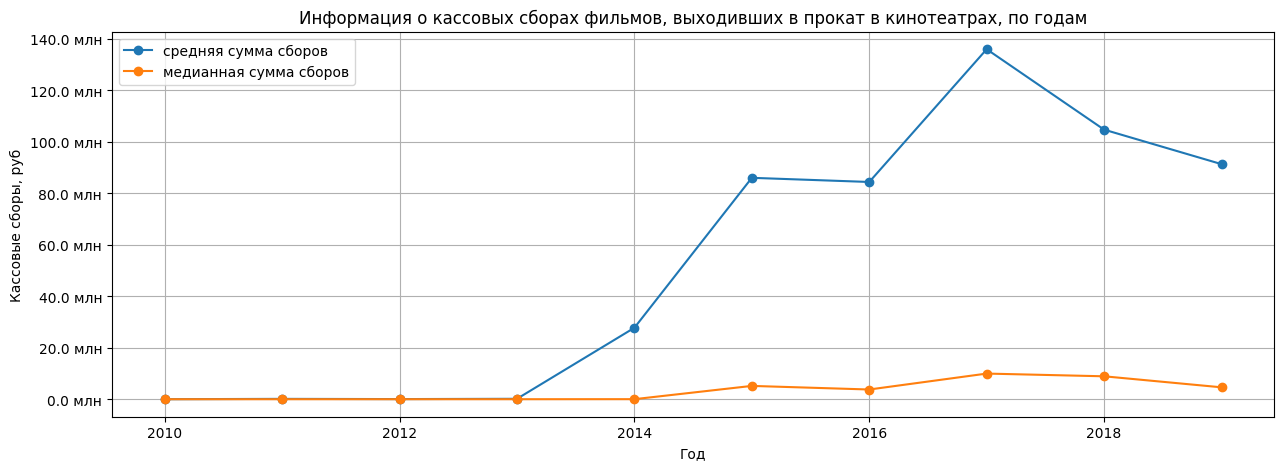

In [108]:
ax = pivot_data_box_office[['средняя сумма сборов', 'медианная сумма сборов']].plot(
        style='o-', figsize=(15, 5), grid=True)
ax.set_xlabel('Год')
ax.set_ylabel('Кассовые сборы, руб')
ax.set_title('Информация о кассовых сборах фильмов, выходивших в прокат в кинотеатрах, по годам')
plt.gca().get_yaxis().set_major_formatter(millions)
plt.show()

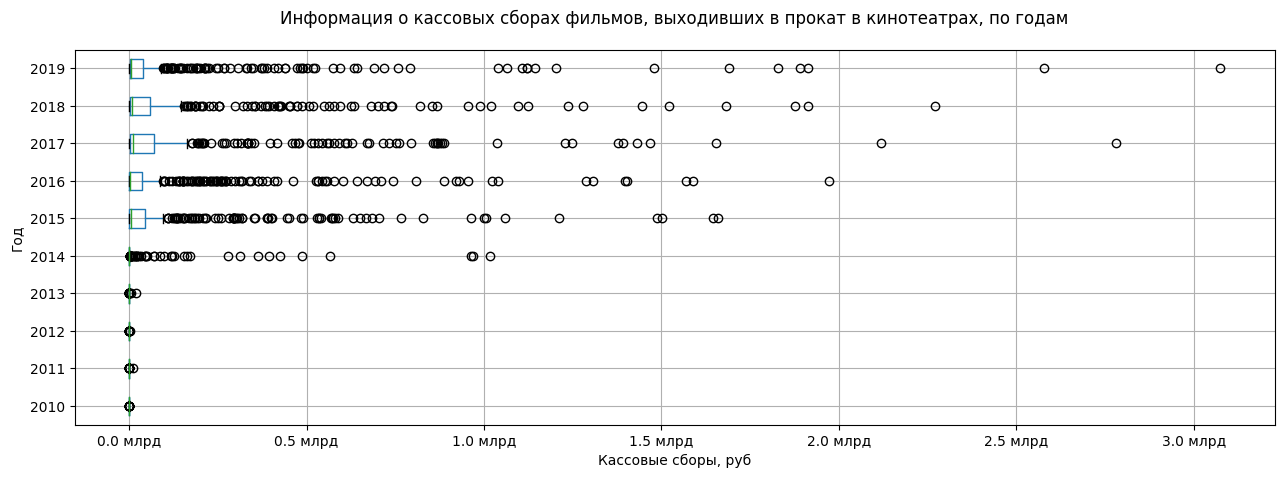

In [109]:
# построим диаграммы размаха для данных о кассовых сборах по годам
ax = data_with_box_office.boxplot(
    column='box_office', by='show_start_date_year', figsize=(15, 5), vert=False)
ax.set_title('')  # Убираем заголовок
ax.set_xlabel('Кассовые сборы, руб')
ax.set_ylabel('Год')
plt.suptitle('Информация о кассовых сборах фильмов, выходивших в прокат в кинотеатрах, по годам')
plt.gca().get_xaxis().set_major_formatter(billions)
plt.show()

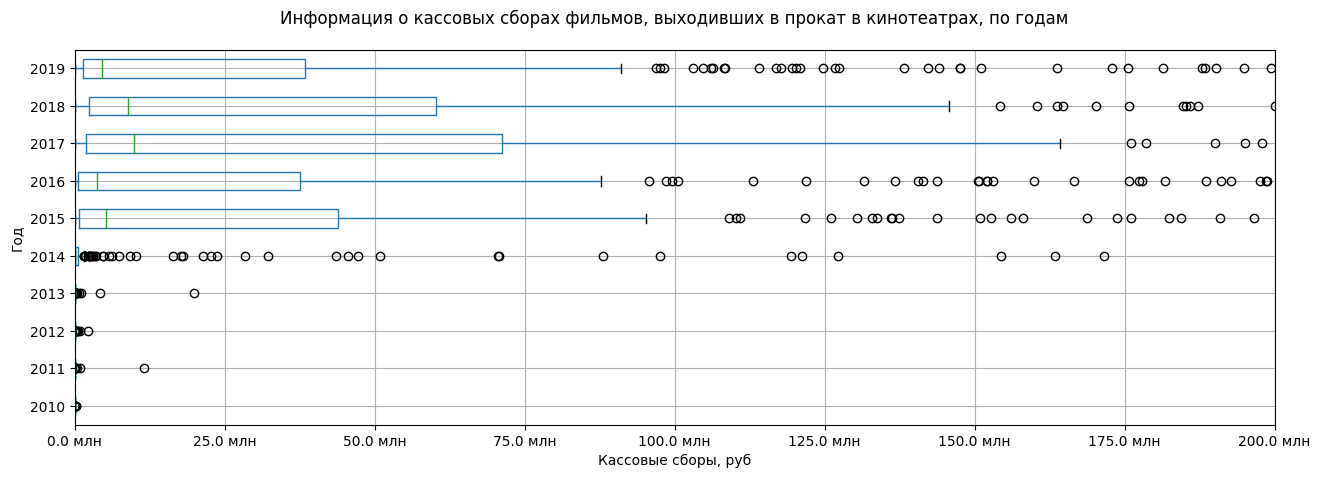

In [110]:
# повторим построение диаграммы размаха для данных о кассовых сборах по годам
# зададим диапазон значений
ax = data_with_box_office.boxplot(
    column='box_office', by='show_start_date_year', figsize=(15, 5), vert=False)
ax.set_xlim(0, 200000000)
ax.set_title('')  # Убираем заголовок
ax.set_xlabel('Кассовые сборы, руб')
ax.set_ylabel('Год')
plt.suptitle('Информация о кассовых сборах фильмов, выходивших в прокат в кинотеатрах, по годам')
plt.gca().get_xaxis().set_major_formatter(millions)
plt.show()

Как мы можем заметить в сводной таблице, среднее значение сборов всегда превышает медианное. На графике отчетливо видно, что начиная с 2014-2015 года (когда стало поступать больше данных о прокате в кинотеатрах), разница между этими значениям становится огромной. На среднее значение сборов очень сильно влияют блокбастеры, кассовые сборы которых намного превосходят медианные значения (видно на диаграмме размаха). 

Наибольшее среднее и медианное значение кассовых сборов за 2017 год - 136 032 793.33 руб и 9 968 340.00 руб, хотя количество фильмов в нем не самое большое (ниже выведен топ-10 по кассовым сборам - одни блокбастеры). 

С 2015 по 2019 годы самое низкое среднее и медианное значение за 2016 год - 84 438 445.33 руб	и 3 778 317.80 руб.

In [111]:
# выведем топ-10 фильмов по кассовым сборам за 2017
(
    data_with_box_office[data_with_box_office['show_start_date_year']==2017]
    .sort_values(by='box_office', ascending=False)
    .head(10).T
)

,5652,3487,5504,3522,3370,3741,3234,5653,5547,5472
title,ДВИЖЕНИЕ ВВЕРХ,ПИРАТЫ КАРИБСКОГО МОРЯ: МЕРТВЕЦЫ НЕ РАССКАЗЫВА...,ПОСЛЕДНИЙ БОГАТЫРЬ,СТРАЖИ ГАЛАКТИКИ. ЧАСТЬ 2,ФОРСАЖ 8,ГАДКИЙ Я 3,БОСС-МОЛОКОСОС,ДЖУМАНДЖИ: ЗОВ ДЖУНГЛЕЙ,ТОР: РАГНАРЁК,ОНО
pu_number,111011817,121009217,111007017,121008117,121005617,124001617,124000317,121027517,121022917,121017617
show_start_date,2017-12-21 12:00:00,2017-05-17 12:00:00,2017-10-19 12:00:00,2017-04-27 12:00:00,2017-04-03 12:00:00,2017-06-15 12:00:00,2017-02-09 12:00:00,2017-12-21 12:00:00,2017-11-02 12:00:00,2017-09-07 12:00:00
type,Художественный,Художественный,Художественный,Художественный,Художественный,Анимационный,Анимационный,Художественный,Художественный,Художественный
film_studio,"ООО ""СТУДИЯ ""ТРИТЭ"" НИКИТЫ МИХАЛКОВА""","ДЖЕРРИ БРУКХАЙМЕР ФИЛМЗ,УОЛТ ДИСНЕЙ ПИКЧЕРЗ,ИН...","ООО ""КИНОСТУДИЯ ""СЛОВО"" ПО ЗАКАЗУ ООО ""УОЛТ ДИ...","МАРВЕЛ СТУДИОС,УОЛТ ДИСНЕЙ ПИКЧЕРЗ","ИТАКА ФИЛМЗ,УАН РЕЙС ФИЛМЗ,ОРИДЖИНАЛ ФИЛЬМ","ИЛЛЮМИНЕЙШЕН ИНТЕРТЕЙНМЕНТ,ЮНИВЕРСАЛ ПИКЧЕРЗ",ДРИМУОРКС АНИМЕЙШН,"МЭТТ ТОЛМАК ПРОДАКШНЗ,РАДАР ПИКЧЕРЗ,СЕВЕН БАКС...","МАРВЕЛ ИНТЕРТЕЙНМЕНТ,МАРВЕЛ СТУДИОС,УОЛТ ДИСНЕ...","НЬЮ ЛАЙН СИНЕМА,КАТЗСМИТ ПРОДАКШНЗ,ЛИН ПИКЧЕРЗ..."
production_country,Россия,США,Россия,США,США,США,США,США,США,США
director,А.МЕГЕРДИЧЕВ,"ЙОАКИМ РЕННИНГ, ЭСПЕН САНДБЕРГ",Д.ДЬЯЧЕНКО,ДЖЕЙМС ГАНН,Ф.ГЭРИ ГРЕЙ,"КАЙЛ БАЛДА, ЭРИК ГУИЛЬОН, ПЬЕР КОФФАН",ТОМ МАКГРАТ,ДЖЕЙК КАСДАН,ТАЙКА ВАЙТИТИ,АНДРЕС МУСКЕТТИ
producer,"Л.ВЕРЕЩАГИН, А.ЗЛАТОПОЛЬСКИЙ, Н.МИХАЛКОВ, ООО ...",ДЖЕРРИ БРУКХАЙМЕР,"Э.ИЛОЯН, Д.ЖАЛИНСКИЙ, М.ОЗКАН, А.ТРОЦЮК, В.ШЛЯППО",КЕВИН ФЕЙГИ,"ВИН ДИЗЕЛЬ, НИЛ Х.МОРИЦ, МАЙКЛ ФОТТРЕЛ","КРИСТОФЕР МЕЛЕДАНДРИ, ДЖАНЕТ ХИЛИ, БРЕТТ ХОФФМАН",РЭМСИ ЭНН НАИТО,МЭТТ ТОЛМАК,КЕВИ ФЕЙГИ,"СЭТ ГРЭМ-СМИТ, РОЙ ЛИ, ДЭН ЛИН"
age_restriction,«6+»,«16+»,«12+»,«16+»,«12+»,«6+»,«6+»,«16+»,«16+»,«18+»
refundable_support,0.00,NaN,"50,000,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# выведем топ-5 фильмов c наименьшими кассовыми сборами за 2016
(
    data_with_box_office[data_with_box_office['show_start_date_year']==2016]
    .sort_values(by='box_office')
    .head(20).T
)

,2651,3193,3076,2176,18,19,2906,2954,2859,3050,660,3413,253,3726,2243,3203,3004,936,2836,3503
title,ПЕСНЬ МОРЯ,МАМА _,СНУПИ И МЕЛОЧЬ ПУЗАТАЯ В КИНО,БОЛЬШАЯ АФЕРА,НЕПОДДАЮЩИЕСЯ,НЕПОДСУДЕН,ДЖЕК СТОУН,КУНГ-ФУ ПАНДА 3,ЗВЕРОПОЛИС,ВИКТОР ФРАНКЕНШТЕЙН,СВАДЕБНЫЙ РАЗГРОМ,МУЛЬТ В КИНО. ВЫПУСК № 44,НЕ МОЖЕТ БЫТЬ!,КАЩЕЙ БЕССМЕРТНЫЙ .,ЗА ТРИДЕВЯТЬ ЗЕМЕЛЬ.,НОВЫЙ ГУЛЛИВЕР.,ГОД ЛИТЕРАТУРЫ,ВОЛШЕБНАЯ СТРАНА.,НЕ СВАДЕБНОЕ ПУТЕШЕСТВИЕ,ДЕНЬ ДО
pu_number,124001316,111002216,224001016,121012316,111003616,111003716,121010016,224002316,224002216,221015616,121012816,114004416,111003116,111009716,124002016,111003816,111009216,124003016,111005316,111010916
show_start_date,2016-04-19 12:00:00,2016-02-12 12:00:00,2016-02-24 12:00:00,2016-05-23 12:00:00,2016-02-12 12:00:00,2016-02-12 12:00:00,2016-04-27 12:00:00,2016-06-07 12:00:00,2016-06-07 12:00:00,2016-02-24 12:00:00,2016-05-23 12:00:00,2016-12-22 12:00:00,2016-02-12 12:00:00,2016-06-15 12:00:00,2016-05-25 12:00:00,2016-02-12 12:00:00,2016-05-24 12:00:00,2016-06-07 12:00:00,2016-03-17 12:00:00,2016-07-06 12:00:00
type,Анимационный,Художественный,Анимационный,Художественный,Художественный,Художественный,Художественный,Анимационный,Анимационный,Художественный,Художественный,Анимационный,Художественный,Анимационный,Анимационный,Художественный,Художественный,Анимационный,Художественный,Художественный
film_studio,"БИГ ФАРМ,КАРТУН САЛУН,ДИДЖИТАЛ ГРАФИКС,ИРИШ ФИ...","КИНОСТУДИЯ ""МОСФИЛЬМ"",КИНОСТУДИЯ ""БУКУРЕШТИ"",К...","БЛЮ СКАЙ СТУДИОС,ХХ ВЕК ФОКС АНИМЕЙШН","МАКС ФИЛМЗ ПРОДАКШНЗ,МОРГАН ЛЬЮИС КОМПАНИ","КИНОСТУДИЯ ""МОСФИЛЬМ""","КИНОСТУДИЯ ""МОСФИЛЬМ""","МЭЙН СТРЭЙ ПРОДАКШН,МЭТЬЮ РИЗ ФИЛЬМ,ВИ ЭМ АЙ В...","ЧАЙНА ФИЛМ КО.,ДРИМУОРКС АНИМЭЙШН,ОРИЭНТАЛ ДРИ...","УОЛТ ДИСНЕЙ АНИМЕЙШН СТУДИОС,УОЛТ ДИСНЕЙ ПИКЧЕРЗ","ДЭВИС ИНТЕРТЕЙНМЕНТ,ТЭ ЭС ГЭ ИНТЕРТЕЙНМЕНТ,МУВ...","ОУБУРН ИНТЕРТЕЙНМЕНТ,ПАРАБОЛИК ПИКЧЕРЗ,СКРИН О...","ООО ""МУЛЬТ В КИНО""","КИНОСТУДИЯ ""МОСФИЛЬМ""","ООО ""СТУДИЯ ""ПОМИДОР""","КОПЕНГАГЕН БОМБЕЙ,ФИЛМ И ВАСТ","КИНОСТУДИЯ ""МОСФИЛЬМ""","ООО ""КИНОКОМПАНИЯ ЭЛИКСИР""","БРЕЙКТРУ ФИЛМЗ,ЭС ЭМ БЭ ИНВЕСТМЕНТС","ООО ""ПРОДЮСЕРСКАЯ КИНОКОМПАНИЯ ""КИНОМИР""","ООО ""КИНОБЮРО"" ПО ЗАКАЗУ ООО ""СРЕДА И КО"""
production_country,"Ирландия,Дания,Бельгия,Люксембург,Франция","СССР,Румыния,Франция",США,Канада,СССР,СССР,США,"США,КНР",США,США,"Великобритания,Австралия,США",Россия,СССР,Россия,"Дания,Швеция",СССР,Россия,"Великобритания,Польша,КНР,Индия,Норвегия",Россия,Россия
director,ТОММ МУР,Э.БОСТАН,СТИВ МАРТИНО,ДОН МАККЕЛЛАР,Ю.ЧУЛЮКИН,"В.КРАСНОПОЛЬСКИЙ, В.УСКОВ",ДЖОН ЛОЙД,"АЛЕССАНДРО КАРЛОНИ, ДЖЕННИФЕР Ю","РИЧ МУР, БАЙРОН ХОВАРД",ПОЛ МАКГИГАН,СТЕФАН ЭЛЛИОТТ,О.СЕМЁНОВА,Л.ГАЙДАЙ,"Е.МИХАЙЛОВА, И.МАКСИМОВ",ЭСБЕН ТОФТ ЯКОБСЕН,А.ПТУШКО,О.СТОЛПОВСКАЯ,"МАРТИН КЛЭПП, ДОРОТА КОБЕЛЯ, ДЖОФФ ЛИНДСИ",Д.ИЗМЕСТЬЕВ,"А.КОТТ, В.КОТТ, А.КАРПИЛОВСКИЙ, Б.ХЛЕБНИКОВ"
producer,"КЛАУС ТОКСВИГ КЬЯЭР, ТОММ МУР, ПОЛ ЯНГ",NaN,"ПОЛ ФИГ, БРАЙАН ШУЛЬЦ, КРЭЙГ ШУЛЬЦ","БАРБОРА ДОРАН, ЖАН-МАРИ КОМЮ, РОДЖЕР ФРАППЬЕ",NaN,NaN,"ДЖОН ЛОЙД, МЭТТЬЮ РИЗ",МЕЛИССА КОББ,КЛАРК СПЕНСЕР,"МАИРИ БЕТТ, ДЕРЕК ДОЧИ, ДЖОН ДЭВИС","АНТОНИЯ БАРНАРД, ГАРИ ХЭМИЛЬТОН",П.СМИРНОВ,NaN,О.ИЗВЕКОВ,"ДЖЕССИКА АСК, САРИТА КРИСТЕНСЕН, ПЕТТЕР ЛИНДБЛАД",NaN,А.СИЛЬВЕСТРОВ,"МАГДАЛЕНА БАРГЕЛ, ХЬЮ ВЕЛЧМАН",Т.ЯКОВЕНКО,"А.ЦЕКАЛО, А.КОТТ"
age_restriction,«6+»,«0+»,«0+»,«16+»,«6+»,«6+»,«18+»,«6+»,«6+»,«16+»,«18+»,«0+»,«12+»,«6+»,«6+»,«0+»,«16+»,«18+»,«12+»,«18+»
refundable_support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"25,000,000.00"


Взглянув на топ-10 фильмов с самыми низкими кассовыми сборами понимаем, что здесь на значение среднего и медианы оказали влияние некорректные значения - меньше, чем 1080. Рейтинг при этом довольно высокий.  Явно допущена ошибка при вводе данных, либо данные предоставлены не полностью. 

<a name ='влияние-возрастного-ограничения'></a>
#### Влияние возрастного ограничения на кассовые сборы

Посмотрим на распределение фильмов, выходивших в прокат в кинотеатрах, по возрастному ограничению аудитории за весь период.

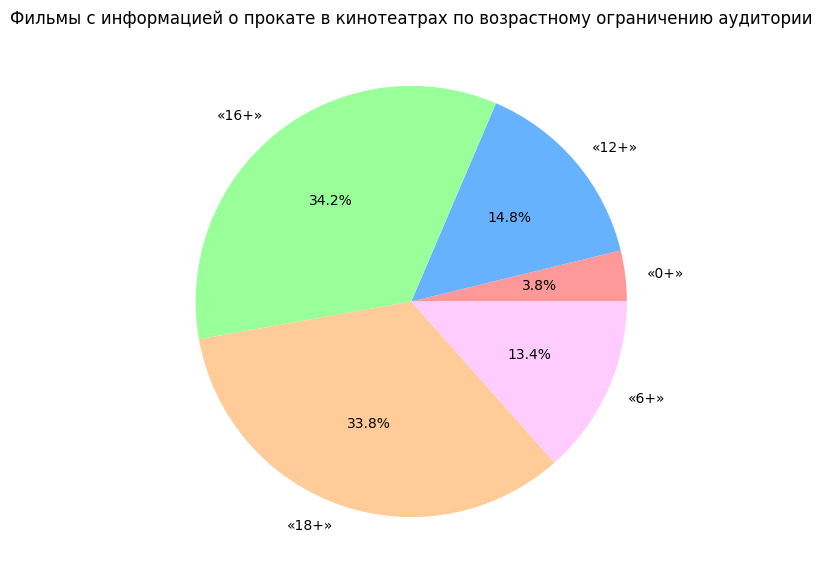

In [113]:
(
    data_with_box_office[data_with_box_office['show_start_date_year'] > 2014]
    .groupby('age_restriction')['box_office']
    .agg('count')
    .plot.pie(figsize=(7, 7),
              title='Фильмы с информацией о прокате в кинотеатрах по возрастному ограничению аудитории',
              autopct='%1.1f%%',
              ylabel='',
              colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFCCFF'])
);

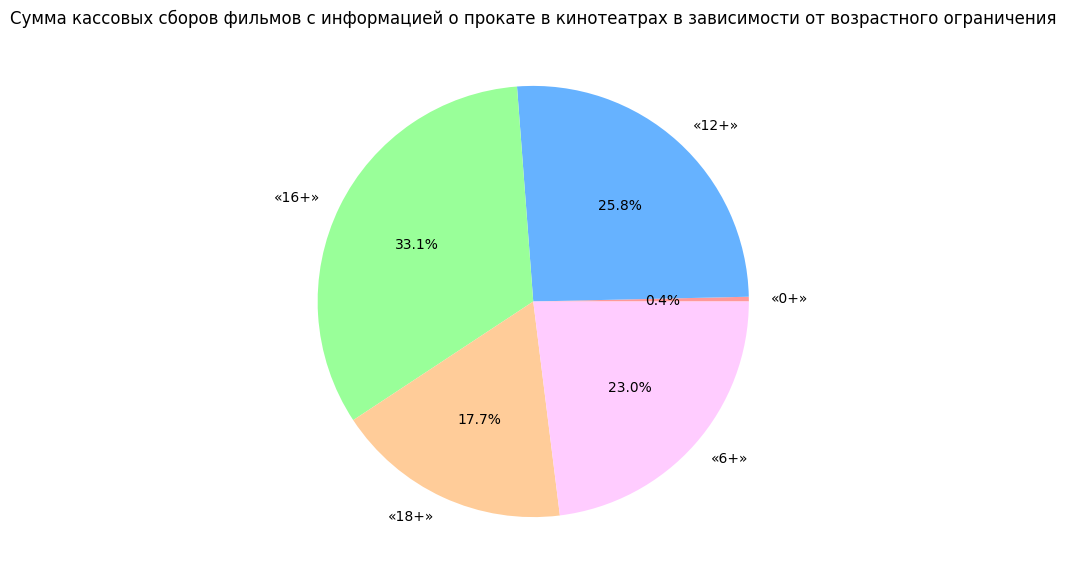

In [114]:
(
    data_with_box_office[data_with_box_office['show_start_date_year'] > 2014]
    .groupby('age_restriction')['box_office']
    .agg('sum')
    .plot.pie(figsize=(7, 7),
              title='Сумма кассовых сборов фильмов с информацией о прокате в кинотеатрах в зависимости от возрастного ограничения',
              autopct='%1.1f%%',
              ylabel='',
              colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFCCFF'])
);

Проанализируем _весь период 2015-2019 гг._. Как видно из диаграммы, доли фильмов для аудитории старше 16 лет и 18 лет практически равны, 34.2% и 33.8% соответственно. Доли фильмов "12+" и "6+" почти в 2,5 раза меньше - 14.8% и 13.4%. Меньше всего представлены фильмы "0+" - таких выходит всего 3.8%. 

При этом по кассовым сборам за этот период лидирую фильмы "16+" - 33.1%. Доля сборов фильмов категории "0+" несравнимо с остальными крайне мала - 0.4%. Такие фильмы меньше всего пользуются популярностью при посещении кинотеатров. Фильмы "18+" принесли только 17.7%, несмотря на то, что они составляли треть из фильмов, представленных в прокате в кинотеатрах за этот период. Фильмы "12+" и "6+", хотя и были представлены в меньшем количестве, чем "18+", собрали почти равные доли - 25.8% и 23.0%.   




Построим сводную таблицу и отобразим количество фильмов каждой из категорий, а также сумму сборов по годам.

In [115]:
(
    data_with_box_office[data_with_box_office['show_start_date_year'] > 2014]
    .pivot_table(
        index='age_restriction',
        columns='show_start_date_year',
        values='box_office',
        aggfunc=['count', 'sum'])
    # выделим минимальное и максимальное значения по столбцам(для каждой категории за период 2015-2019)
    .style
    .highlight_max(axis=0, color='lightgreen', subset=['count', 'sum'])
    .highlight_min(axis=0, color='lightcoral', subset=['count', 'sum'])
    .format({'count':'{:.2f}', 'sum':'{:.2f}'})
)

Построим диаграмму размаха кассовых сборов по возрастным категориям.

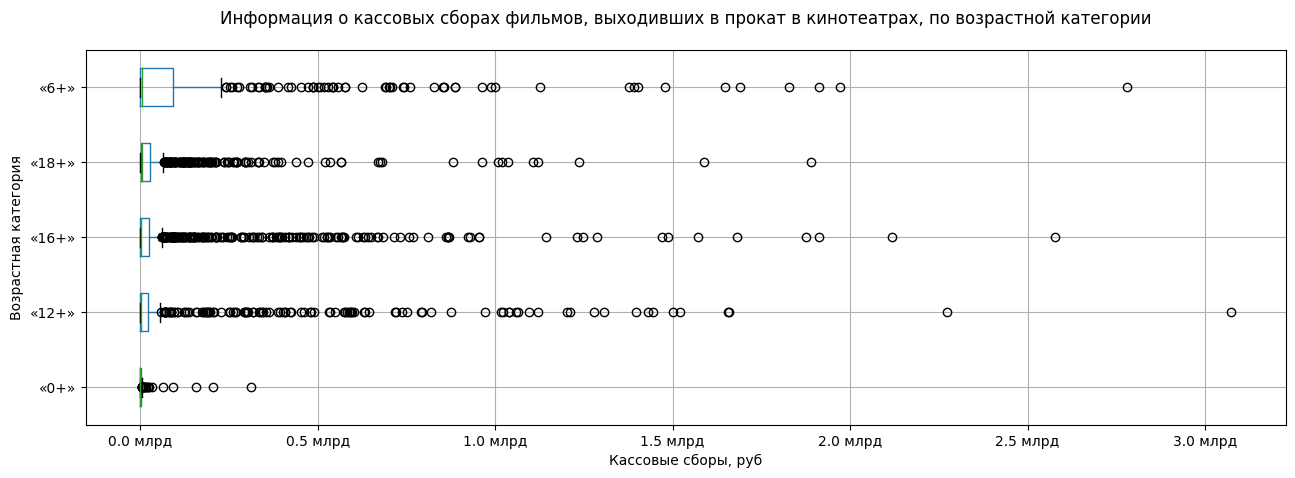

In [116]:
# построим диаграммы размаха для данных о кассовых сборах по возрастным категориям
ax = data_with_box_office.boxplot(
    column='box_office', by='age_restriction', figsize=(15, 5), vert=False)
ax.set_title('')  # Убираем заголовок
ax.set_xlabel('Кассовые сборы, руб')
ax.set_ylabel('Возрастная категория')
plt.suptitle('Информация о кассовых сборах фильмов, выходивших в прокат в кинотеатрах, по возрастной категории')
plt.gca().get_xaxis().set_major_formatter(billions)
plt.show()

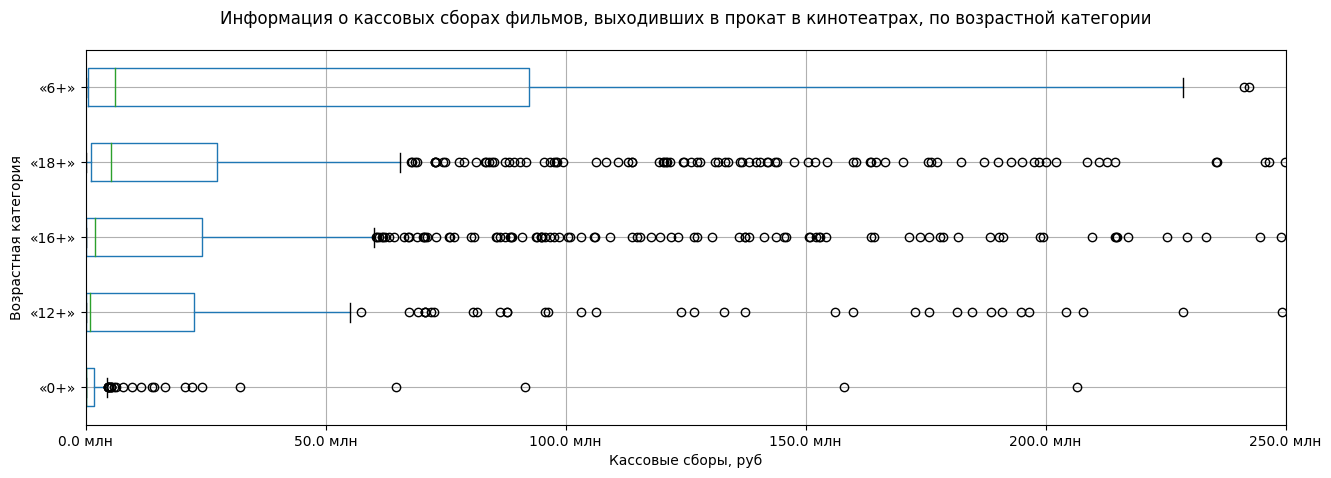

In [117]:
# повторим построение, задав ограничение по оси x
ax = data_with_box_office.boxplot(
    column='box_office', by='age_restriction', figsize=(15, 5), vert=False)
ax.set_title('')  # Убираем заголовок
ax.set_xlabel('Кассовые сборы, руб')
ax.set_ylabel('Возрастная категория')
ax.set_xlim(0, 250_000_000)
plt.suptitle('Информация о кассовых сборах фильмов, выходивших в прокат в кинотеатрах, по возрастной категории')
plt.gca().get_xaxis().set_major_formatter(millions)
plt.show()

Видим наличие большого количество выбросов, меньше всего их для категории "0+". Диапазон значений, в котором находитcя основная часть данных о кассовых сборах, для возрастной категории "6+" гораздо шире, чем для остальных категорий, медианное значение также самое большое среди категорий, самый узкий диапазон и медианное значение - для категории "0+". Все медианные значения находятся возле левого края ящика, в нашем случае это говорит о том, что значительная часть данных о кассовых сборах для всех возрастных категорий сосредоточена в низких значениях.

Отобразим изменение кассовых сборов каждой из категорий по годам на графике.

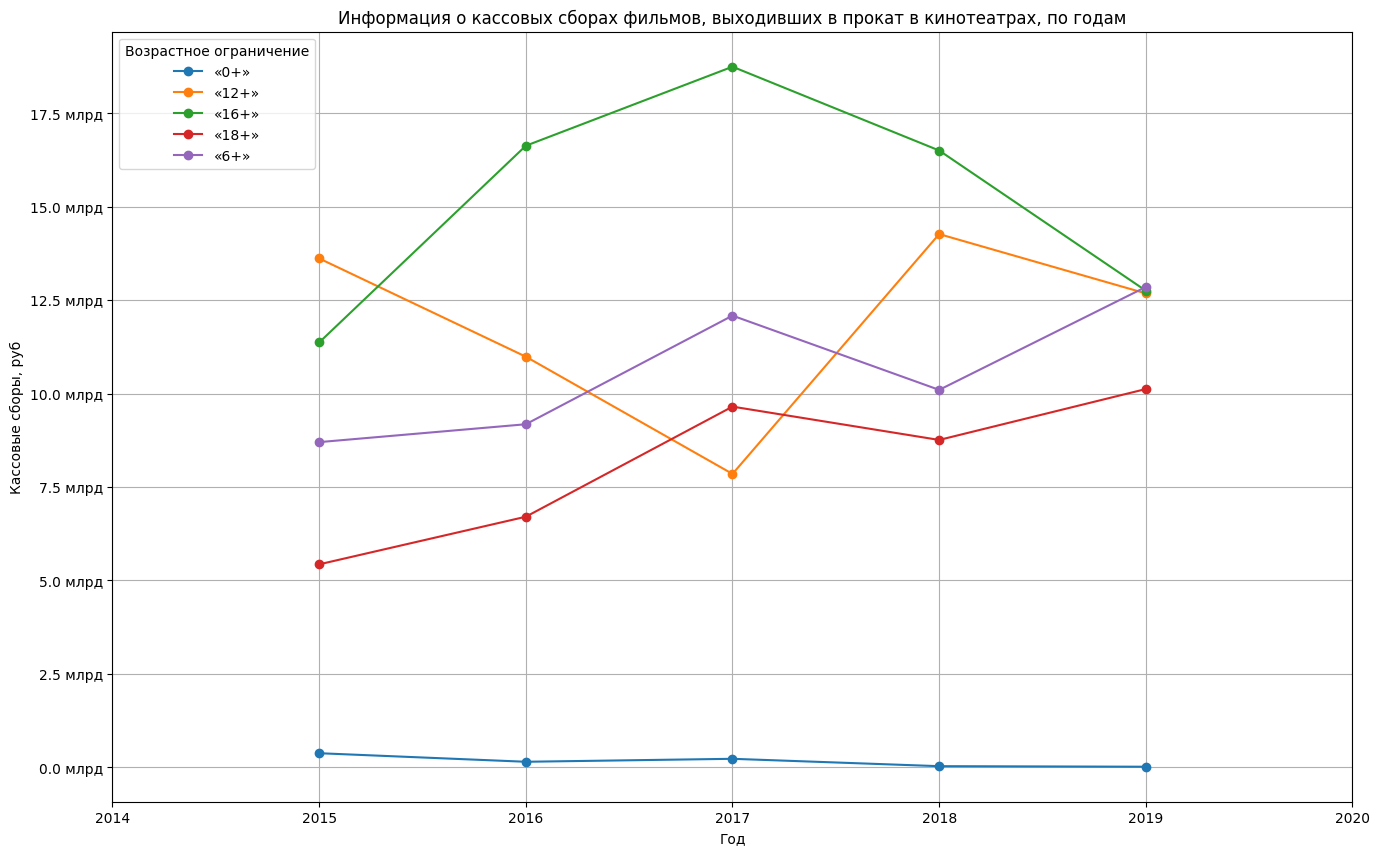

In [118]:
pivot_data_age_restriction = data_with_box_office[data_with_box_office['show_start_date_year'] > 2014].pivot_table(
    index='show_start_date_year',
    columns= 'age_restriction',
    values='box_office',
    aggfunc='sum')

ax = pivot_data_age_restriction.plot(
    style="o-", legend=True, figsize=(16, 10),
    grid=True, xlabel='Год', ylabel='Кассовые сборы, руб',
    title='Информация о кассовых сборах фильмов, выходивших в прокат в кинотеатрах, по годам')
ax.set_xlim(2014, 2020)
ax.legend(loc='upper left', title='Возрастное ограничение');
plt.gca().get_yaxis().set_major_formatter(billions)
plt.show()

В ходе анализа фильмов, выходивших в прокат в кинотеатрах в 2015-2019 годах, заметили, что самые низкие сборы у фильмов категории "0+", что обьясняется несравнимо меньшим количеством таких фильмов - всего 3.8%, и, видимо, небольшой популярностью. Это мы и видим на графике и в таблице. Можно сказать, что в целом наблюдается некоторая тенденция к росту кассовых сборов для категорий "6+" и "18+" (за исключением спада в 2018, хотя количество фильмов, которые были в прокате в кинотеатрах в этом году,  было больше, чем за предыдущий год). 

Фильмы "12+" собрали больше остальных в 2015 году. В топ-4 мы можем увидеть фильмы, которые являются ожидаемыми продолжениями историй, т.е. у них уже есть своя довольно широкая аудитория. Видимо, выход таких блокбастеров в течение одного года и привел в росту кассовых сборов для категории «12+» за 2015 год. Для фильмов "12+" наблюдалось резкое уменьшение суммы сборов в 2017 году (в этот год в прокат вышло наименьшее число фильмов данной категории, почти в 2 раза меньше, чем за 2016 год). 

Кассовые сборы фильмов "16+" росли с 2015 года и в 2017 году достигли пикового значения (в том числе среди остальных категорий за весь период)- 18745042900 руб, в 2018-2019 годах наблюдается спад. Кассовые сборы фильмов "16+", "12+" и "6+", близки друг к другу и превышают значения остальных категорий.  

Можно предположить, что в 2019 году в лидеры выбилась категория "6+" за счет популярности анимационных фильмов, входящих в топ-5 в том числе не только среди детей, но и среди взрослой аудитории.  Некоторые из фильмов также являются продолжениям уже известных полюбившихся широкой аудитории историй.

In [119]:
# топ-5 самых кассовых фильмов "12+" за 2015
(
    data_with_box_office[
        (data_with_box_office['show_start_date_year'] == 2015) &
        (data_with_box_office['age_restriction'] == '«12+»')]
    .sort_values(by='box_office', ascending=False).head(5).T
)

,3116,2158,2578,2508,2598
title,ЗВЁЗДНЫЕ ВОЙНЫ: ПРОБУЖДЕНИЕ СИЛЫ,МСТИТЕЛИ: ЭРА АЛЬТРОНА,МИР ЮРСКОГО ПЕРИОДА,ТЕРМИНАТОР: ГЕНЕЗИС,ЭВЕРЕСТ (2015)
pu_number,121024915,121007215,121006515,121012415,121012815
show_start_date,2015-12-11 12:00:00,2015-04-03 12:00:00,2015-04-03 12:00:00,2015-06-11 12:00:00,2015-06-23 12:00:00
type,Художественный,Художественный,Художественный,Художественный,Художественный
film_studio,"ЛУКАСФИЛМ,БЭД РОБОТ,ТРУНОРТ ПРОДАКШНЗ",МАРВЕЛ СТУДИОС,"ЭМБЛИН ИНТЕРТЕЙНМЕНТ,ЛЕДЖЕНДАРИ ПИКЧЕРЗ,ЮНИВЕР...","ПАРАМАУНТ ПИКЧЕРЗ,СКАЙДЭНС ПРОДАКШНЗ","КРОСС КРИК ПИКЧЕРЗ,ФРИ СТЕЙТ ПИКЧЕРЗ,ЭР ВЭ КА ..."
production_country,США,США,США,США,США
director,ДЖЕЙ ДЖЕЙ АБРАМС,ДЖОСС УИДОН,КОЛИН ТРЕВОРРОУ,АЛАН ТЭЙЛОР,БАЛЬТАЗАР КОРМАКУР
producer,"ДЖЕЙ ДЖЕЙ АБРАМС, БРАЙАН БЕРК, КЭТЛИН КЕННЕДИ",КЕВИН ФЕЙГИ,"ПАТРИК КРАУЛИ, ФРЭНК МАРШАЛЛ","ДЭВИД ЭЛЛИСОН, ДЭНА ГОЛДБЕРГ","НИКИ КЕНТИШ БАРНС, ТИМ БЕВАН, ЛИЗА ЧЕЙСИН"
age_restriction,«12+»,«12+»,«12+»,«12+»,«12+»
refundable_support,NaN,NaN,NaN,NaN,NaN


In [120]:
# топ-5 самых кассовых фильмов "6+" за 2019
(
    data_with_box_office[
        (data_with_box_office['show_start_date_year'] == 2015) &
        (data_with_box_office['age_restriction'] == '«6+»')]
    .sort_values(by='box_office', ascending=False).head(5).T
)

,2577,2510,2494,1896,3104
title,МИНЬОНЫ,МОНСТРЫ НА КАНИКУЛАХ 2,ГОЛОВОЛОМКА. ЛАВА,ДОМ _,ИВАН ЦАРЕВИЧ И СЕРЫЙ ВОЛК 3
pu_number,124001715,124003615,124002315,124000915,114004115
show_start_date,2015-03-30 12:00:00,2015-10-15 12:00:00,2015-05-27 12:00:00,2015-02-25 12:00:00,2015-12-24 12:00:00
type,Анимационный,Анимационный,Анимационный,Анимационный,Анимационный
film_studio,ИЛЛЮМИНЕЙШН ИНТЕРТЕЙНМЕНТ,"КОЛАМБИА ПИКЧЕРЗ,ЭЛСТАР КЭПИТАЛ,СОНИ ПИКЧЕРЗ А...","ПИКСАР АНИМЕЙШН СТУДИОС,УОЛТ ДИСНЕЙ ПИКЧЕРЗ",ДРИМУОРКС АНИМЕЙШН,"ООО ""СТУДИЯ АНИМАЦИОННОГО КИНО ""МЕЛЬНИЦА"""
production_country,США,США,США,США,Россия
director,"КАЙЛ БАЛДА, ПЬЕР СОФФИН",ГЕННАДИЙ ТАРТАКОВСКИЙ,"ПИТ ДОКТЕР, РОНАЛДО ВУД КАРМЕН",ТИМ ДЖОНСОН,Д.ШМИДТ
producer,"КРИСТОФЕР МЕЛЕДАНДРИ, ДЖАНЕТ ХИЛИ","АЛЛЕН КОВЕРТ, МИШЕЛЬ МЕРДОККА",ДЖОНАС РИВЕРА,"СЮЗАН БЕРГИ, МИРЕЙ СОРИЯ","С.СЕЛЬЯНОВ, А.БОЯРСКИЙ"
age_restriction,«6+»,«6+»,«6+»,«6+»,«6+»
refundable_support,NaN,NaN,NaN,NaN,0.00


<a  name="промежуточный-вывод-3"></a>
__Промежуточный вывод__

- Данные о прокате в кинотеатрах известны для 43.38% фильмов, есть данные за каждый год с 2010 по 2019. Много данных имеется за период 2015-2019 гг. (фильмы с указанной информацией о прокате в кинотеатрах составляют более 53% за год), однако полнее всего представлен период 2015-2017 (записей с информацией о прокате в кинотеатрах более 66%). Больше всего данных о выходе фильмов в прокат в кинотеатрах за 2017 год (70.69% от общего числа фильмов за год). Медианное значение количества фильмов, выпускаемых в прокат за год - 726, выпускаемых в прокат в кинотеатрах - 312. Можно предположить, что на рост количества внесенных данных в 2014-2015 годах повлияло подключение кинотеатров небольших городов и введение ответственности за непредоставление данных.  Большую долю фильмов, по которым имеется информация о прокате в кинотеатрах, составляют фильмы, выпущенные в других странах(не в России), тенденции к изменению этого соотношения не наблюдается. В 2017 году наблюдалось снижение количества российских фильмов, вышедших в прокат в кинотеатрах.

- Несмотря на то, что больше всего записей о фильмах, вышедших в прокат в 2019 году, максимальная сумма сборов была достигнута в 2018 и составила 49 662 863 161 рубль. Меньше всего данных о кассовых сборах за 2010 год - всего о 78 фильмах, отсюда и наименьшая сумма кассовых сборов - 810 766 рублей. За период с 2015 по 2019 год, наименьшая сумма кассовых сборов за 2015 год - 39 497 356 036 рублей. За период 2015 по 2018 наблюдался рост кассовых сборов российских фильмов, несмотря на снижение их количества в 2017 со 132 до 52. Суммарные кассовые сборы всех российских фильмов, вышедших в 2019 году, снизились. Кассовые сборы фильмов, выпущенных в других странах, растут, был временный спад в 2018 году.

- Среднее значение сборов всегда превышает медианное. На среднее значение сборов очень сильно влияют блокбастеры, кассовые сборы которых намного превосходят медианные значения. Наибольшее среднее и медианное значение кассовых сборов за 2017 год - 136 032 793.33 руб и 9 968 340.00 руб. С 2015 по 2019 годы самое низкое среднее и медианное значение за 2016 год - 84 438 445.33 руб и 3 778 317.80 руб.

- Возрастное ограничение влияет на сборы фильма в прокате.  За 2015-2019 гг. доли фильмов "16+" и "18+" практически равны, 34.2% и 33.8% соответственно. Доли фильмов "12+" и "6+" - 14.8% и 13.4%. Меньше всего представлены фильмы "0+" - всего 3.8%. При этом по кассовым сборам за этот период лидируют фильмы "16+" - 33.1%. Доля сборов фильмов категории "0+" крайне мала - 0.4%. Такие фильмы меньше всего пользуются популярностью при посещении кинотеатров. Фильмы "18+" принесли только 17.7%, фильмы "12+" и "6+", хотя и были представлены в меньшем количестве, чем "18+", собрали почти равные доли - 25.8% и 23.0%. Значительная часть данных о кассовых сборах для всех возрастных категорий сосредоточена в низких значениях. Наблюдается некоторая тенденция к росту кассовых сборов для категорий "6+" и "18+" (за исключением спада в 2018, хотя количество фильмов, которые были в прокате в кинотеатрах в этом году,  было больше, чем за предыдущий год). Фильмы "12+" собрали больше остальных в 2015 году (предположительно, из-за выхода блокбастеров, продолжений историй, имеющих свою широкую аудиторию еще до премьеры). Для фильмов "12+" наблюдалось резкое уменьшение суммы сборов в 2017 году (в этот год в прокат вышло наименьшее число фильмов данной категории, почти в 2 раза меньше, чем за 2016 год). Кассовые сборы фильмов "16+" росли с 2015 года и в 2017 году достигли пикового значения (в том числе среди остальных категорий за весь период)- 18745042900 руб, в 2018-2019 годах наблюдается спад. Кассовые сборы фильмов "16+", "12+" и "6+", близки друг к другу и превышают значения остальных категорий. Можно предположить, что в 2019 году в лидеры выбилась категория "6+" за счет популярности анимационных фильмов, входящих в топ-5 в том числе не только среди детей, но и среди взрослой аудитории.  Некоторые из фильмов также являются продолжениям уже известных полюбившихся широкой аудитории историй. 

<a name = 'фильмы-получившие-господдержку'></a>
### Анализ фильмов, которые получили государственную поддержку

Добавим в данные столбец `support`, содержащий данные об общей сумме господдержки.

In [121]:
data['support'] = data['refundable_support'] +  data['nonrefundable_support']

В рамках нашего ииследования будем считать, что окупаемость достигается, когда общие кассовые сборы превышают бюджет, затраченный на производство картины. Вместе с тем стоит отметить, что обычно продвижение фильма в соцсетях, коллаборации с блогерами, реклама на телевидении и радио в бюджет фильма не входит. 

Создадим стобец, содержащий данные о том, окупился ли фильм.

In [122]:
data['payback'] = data.apply(lambda x: True if x['box_office'] >= x['budget'] else False, axis=1)

Создадим выборку данных по фильмам, получившим господдержку. 

In [123]:
data_with_support = data[data['budget'].notna()]
data_with_support.shape[0]

332

<a name='господдержка-количество-фильмов-по-годам'></a>
Таких записей всего 332. Посмотрим, скольким фильмам и в каком объеме оказывалась господдержка по годам.

In [124]:
data_with_support_grouped = (
    data_with_support
    .groupby('show_start_date_year')
    .agg(
        number_of_films=('support', 'count'),
        refundable_support=('refundable_support', 'sum'),
        nonrefundable_support=('nonrefundable_support', 'sum'),
        total_support=('support', 'sum'),
        median_support=('support', 'median')
    )
)
data_with_support_grouped['percent_of_refundable_support'] = \
    100 * data_with_support_grouped['refundable_support'] / data_with_support_grouped['total_support']
data_with_support_grouped['percent_of_nonrefundable_support'] = \
    100 * data_with_support_grouped['nonrefundable_support'] / data_with_support_grouped['total_support']

(
    data_with_support_grouped
    .style.format(
        {'refundable_support':'{:.2f}', 'nonrefundable_support':'{:.2f}', 'total_support':'{:.2f}',
         'percent_of_refundable_support':'{:.2f}', 'percent_of_nonrefundable_support':'{:.2f}'})
    .highlight_max(axis=0, color='lightgreen')
    .highlight_min(axis=0, color='lightcoral')
)

,number_of_films,refundable_support,nonrefundable_support,total_support,median_support,percent_of_refundable_support,percent_of_nonrefundable_support
show_start_date_year,,,,,,,
2013,2,0.00,134347945.00,134347945.00,67173972.500000,0.00,100.00
2014,16,71000000.00,501002299.00,572002299.00,27500000.000000,12.41,87.59
2015,86,637153119.00,3019088340.00,3656241459.00,30000000.000000,17.43,82.57
2016,61,921500000.00,3381655482.00,4303155482.00,35000000.000000,21.41,78.59
2017,41,719346881.00,2464624781.00,3183971662.00,40000000.000000,22.59,77.41
2018,56,662000000.00,2784969465.00,3446969465.00,45000000.000000,19.21,80.79
2019,70,928000000.00,3976000000.00,4904000000.00,40000000.000000,18.92,81.08


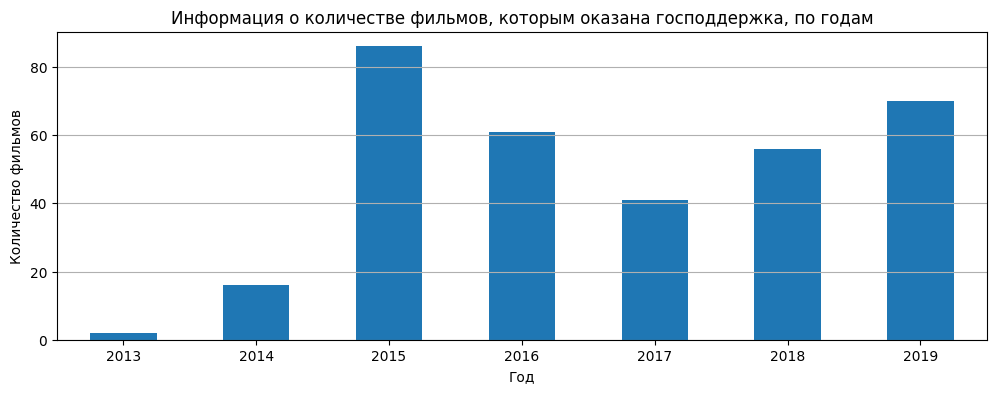

In [125]:
data_with_support_grouped['number_of_films'].plot(
    kind='bar', figsize=(12, 4), grid=True, xlabel='Год', ylabel='Количество фильмов',
    title='Информация о количестве фильмов, которым оказана господдержка, по годам',
    rot=0).grid(axis='x');

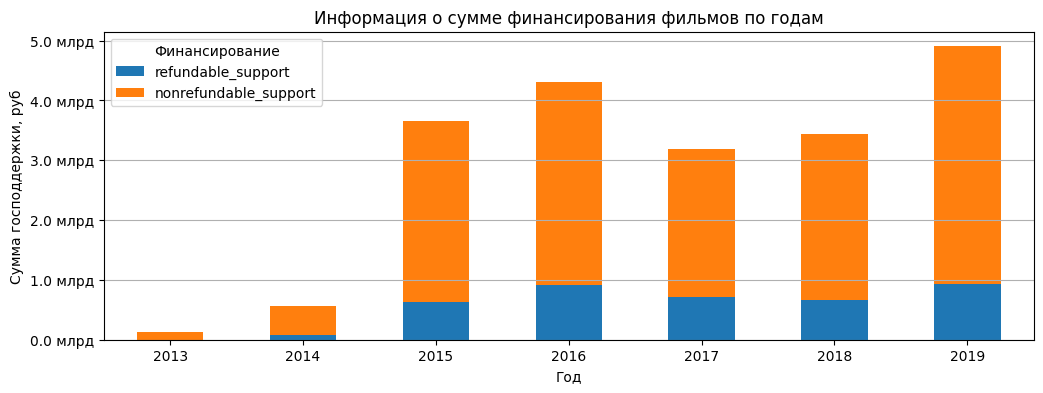

In [126]:
# построим гистограмму для отображения финансирования по годам
ax = (
    data_with_support_grouped[['refundable_support', 'nonrefundable_support']]
    .plot(
        kind='bar', figsize=(12, 4), grid=True, xlabel='Год', ylabel='Сумма господдержки, руб', 
        title='Информация о сумме финансирования фильмов по годам',
        stacked=True, rot=0))
ax.legend(loc='upper left', title='Финансирование')
ax.grid(axis='x')
plt.gca().get_yaxis().set_major_formatter(billions)
plt.show()

In [127]:
# получим описание данных для столбцов data_with_support_grouped
data_with_support_grouped.describe()

,number_of_films,refundable_support,nonrefundable_support,total_support,median_support,percent_of_refundable_support,percent_of_nonrefundable_support
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,47.43,"562,714,285.71","2,323,098,330.29","2,885,812,616.00","40,667,710.36",16.00,84.00
std,29.85,"378,709,147.59","1,453,790,800.20","1,825,904,961.18","13,175,443.84",7.77,7.77
min,2.00,0.00,"134,347,945.00","134,347,945.00","27,500,000.00",0.00,77.41
25%,28.50,"354,076,559.50","1,482,813,540.00","1,877,986,980.50","32,500,000.00",14.92,79.69
50%,56.00,"662,000,000.00","2,784,969,465.00","3,446,969,465.00","40,000,000.00",18.92,81.08
75%,65.50,"820,423,440.50","3,200,371,911.00","3,979,698,470.50","42,500,000.00",20.31,85.08
max,86.00,"928,000,000.00","3,976,000,000.00","4,904,000,000.00","67,173,972.50",22.59,100.00


In [128]:
# повторим запрос для периода с 2015 по 2019 год
data_with_support_grouped.loc[[2015, 2016, 2017, 2018, 2019]].describe()

,number_of_films,refundable_support,nonrefundable_support,total_support,median_support,percent_of_refundable_support,percent_of_nonrefundable_support
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,62.80,"773,600,000.00","3,125,267,613.60","3,898,867,613.60","38,000,000.00",19.91,80.09
std,16.69,"141,182,047.60","581,593,963.32","697,835,117.33","5,700,877.13",2.07,2.07
min,41.00,"637,153,119.00","2,464,624,781.00","3,183,971,662.00","30,000,000.00",17.43,77.41
25%,56.00,"662,000,000.00","2,784,969,465.00","3,446,969,465.00","35,000,000.00",18.92,78.59
50%,61.00,"719,346,881.00","3,019,088,340.00","3,656,241,459.00","40,000,000.00",19.21,80.79
75%,70.00,"921,500,000.00","3,381,655,482.00","4,303,155,482.00","40,000,000.00",21.41,81.08
max,86.00,"928,000,000.00","3,976,000,000.00","4,904,000,000.00","45,000,000.00",22.59,82.57


Датасет содержит данные о фильмах, которым оказывалась господдержка, за период с 2013 по 2019 год. Однако наиболее полно данные представлены начиная с 2015 года, что совпадает с нашими выводами выше. 

Количество фильмов, которым оказывалась господдержка, с 2015 по 2017 год снизилось почти в 2 раза, с 2017 снова начало расти. Наблюдается рост сумм, затраченных на финансирование, с 2015 по 2016 год, затем спад в 2017 (соответствует уменьшению количества фильмов), и снова устойчивый рост с 2017 по 2019 год. Объём невозвратных средств всегда значительно превышает объем возвратных средств государственной поддержки.

За период 2015-2019 гг. медианное значение количества спонсируемых фильмов - 61, медианная сумма оказываемой поддержки - 3 656 241 459 руб, медианная доля возвратных средств - 19,21%.

Наибольшая медианная сумма, затрачиваемая на поддержку одному фильму, составила 67 173 972.5 руб в 2013 году, наименьшая - 27 500 000 руб в 2014. Затем ее значение растет и к 2018 году достигает 45 000 000 руб,  в 2019 году снижается до 40 000 000 руб.

Больше всего средств на поддержку фильмов затрачено в 2019 - 4 904 000 000	руб.

<a name='господдержка-по-жанрам'></a>

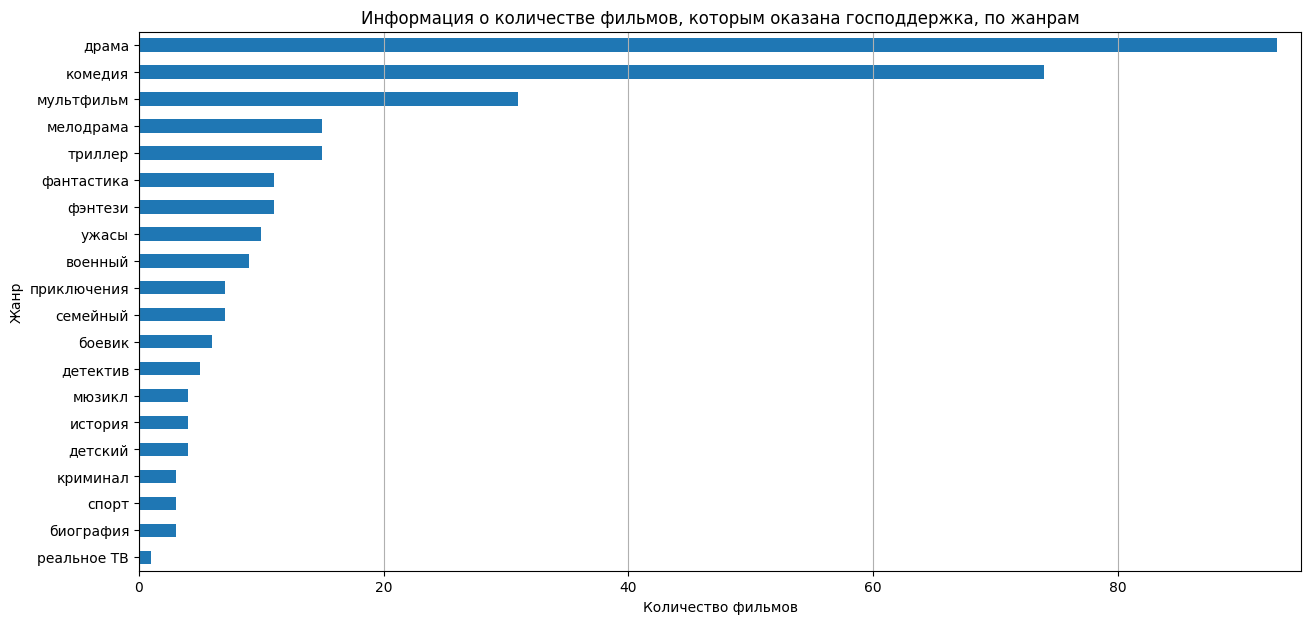

In [129]:
# построим график количества фильмов, получивших господдержку, по жанрам
ax = (
    data_with_support
    .groupby('genres_main')['support']
    .agg('count')
    .sort_values()
    .plot(
        kind='barh', figsize=(15, 7), grid=True, rot=0,
    xlim=(0, 95)))
ax.grid(axis='y')
ax.set_ylabel('Жанр')
ax.set_xlabel('Количество фильмов')
ax.set_title('Информация о количестве фильмов, которым оказана господдержка, по жанрам')
plt.show()

Можно заметить, что в основном государственную поддержку получают фильмы, относящиеся к жанрам драма, комедия или мультфильм (рассчитаны на широкую аудиторию), реже всего - фильмы жанра реальное ТВ, биография, спорт, криминал.

<a name='господдержка-источник-финансирования'></a>
Рассмотрим, какую долю фильмов финансирует каждый из возможных источников финансирования.

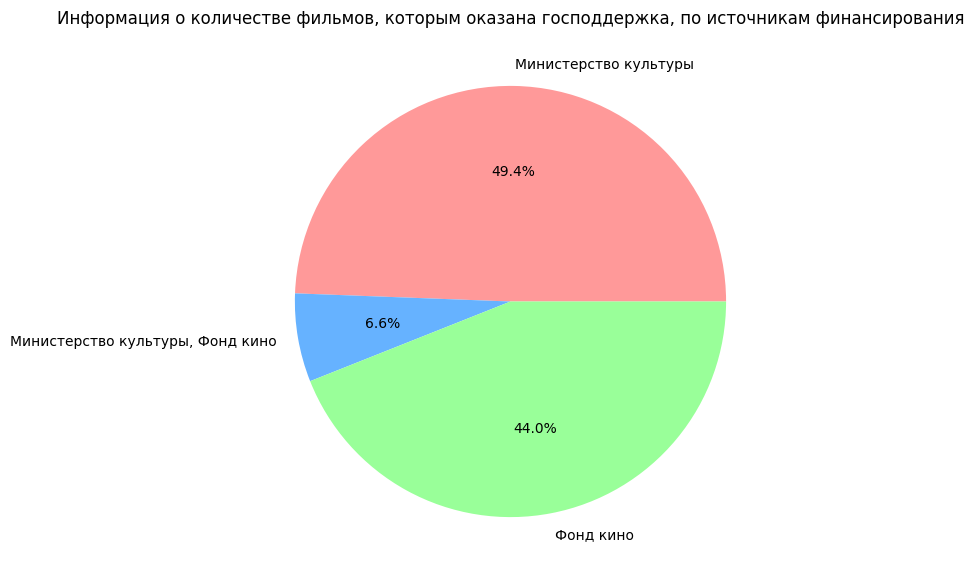

In [130]:
(
    data_with_support
    .groupby('financing_source')['budget']
    .agg('count')
    .plot.pie(figsize=(7, 7),
              title='Информация о количестве фильмов, которым оказана господдержка, по источникам финансирования',
              autopct='%1.1f%%',
              ylabel='',
              colors=['#FF9999', '#66B2FF', '#99FF99'])
);

Как видим, 49.4% проектов финансируются Министерством культуры, 44% Фондом кино, а 6.6% получили финансирование из обоих источников.

In [131]:
# максимальный объем безвозвратных средств государственной поддержки
max = data[data['nonrefundable_support'].notna()]['nonrefundable_support'].max()
data[data['nonrefundable_support'] == max].T

,5652,7463,7473
title,ДВИЖЕНИЕ ВВЕРХ,СОЮЗ СПАСЕНИЯ,ВТОРЖЕНИЕ
pu_number,111011817,111022019,111022519
show_start_date,2017-12-21 12:00:00,2019-12-26 12:00:00,2019-12-23 12:00:00
type,Художественный,Художественный,Художественный
film_studio,"ООО ""СТУДИЯ ""ТРИТЭ"" НИКИТЫ МИХАЛКОВА""","ЗАО ""ДИРЕКЦИЯ КИНО""","ООО ""АРТ ПИКЧЕРС СТУДИЯ"",ООО ""ВОДОРОД 2011"""
production_country,Россия,Россия,Россия
director,А.МЕГЕРДИЧЕВ,А.КРАВЧУК,Ф.БОНДАРЧУК
producer,"Л.ВЕРЕЩАГИН, А.ЗЛАТОПОЛЬСКИЙ, Н.МИХАЛКОВ, ООО ...","А.МАКСИМОВ, К.ЭРНСТ","Ф.БОНДАРЧУК, М.ВРУБЕЛЬ, А.АНДРЮЩЕНКО, Д.РУДОВСКИЙ"
age_restriction,«6+»,«12+»,«12+»
refundable_support,0.00,"100,000,000.00","100,000,000.00"


In [132]:
# максимальный объем возвратных средств государственной поддержки
max = data[data['refundable_support'].notna()]['refundable_support'].max()
data[data['refundable_support'] == max].T

,7113
title,ТАЙНА ПЕЧАТИ ДРАКОНА
pu_number,111012819
show_start_date,2019-09-12 12:00:00
type,Художественный
film_studio,"ООО ""КИНОКОМПАНИЯ ""СТВ""; ООО ""РФГ КОРП""; ООО ""..."
production_country,"Россия,Китай"
director,О.СТЕПЧЕНКО
producer,"С.СЕЛЬЯНОВ, А.ПЕТРУХИН"
age_restriction,«6+»
refundable_support,"180,000,000.00"


Максимальный объем безвозвратной поддержки составил 400 000 000 руб. Такую сумму получили фильмы "Движение вверх"(2017 г.), "Cоюз спасения"(2019 г.), "Вторжение"(2019 г.), из них окупился только первый. Максимальный объем возвратной поддержки 180 000 000 руб. получил фильм "Тайна печати дракона"(2019 г.), который не окупился. 

<a name='господдержка-окупаемость'></a>
Взглянем на окупаемость фильмов, получивших господдержку.

In [133]:
data_with_support_payback = (
    data_with_support
    .groupby('show_start_date_year')
    .agg(
        number_of_films=('support', 'count'),
        number_of_profitable_films=('payback', 'sum'),
        number_of_notprofitable_films=('payback', lambda x: x.shape[0] - x.sum()),
        share_of_payback=('payback', 'mean')
    )
)
data_with_support_payback = (
    pd.concat(
        [data_with_support_payback,
         # добавим строку с информацией за весь период
         pd.DataFrame(
             {'number_of_films': [data_with_support['payback'].count()],
              'number_of_profitable_films': [data_with_support['payback'].sum()],
              'number_of_notprofitable_films': [data_with_support['payback'].count() - data_with_support['payback'].sum()],
             'share_of_payback':[data_with_support['payback'].sum() / data_with_support['payback'].count()]},
             index = ['TOTAL'])]
    )
)
data_with_support_payback


,number_of_films,number_of_profitable_films,number_of_notprofitable_films,share_of_payback
2013,2,0,2,0.00
2014,16,3,13,0.19
2015,86,17,69,0.20
2016,61,11,50,0.18
2017,41,13,28,0.32
2018,56,18,38,0.32
2019,70,11,59,0.16
TOTAL,332,73,259,0.22


Можно отметить, что в среднем окупается около 22% фильмов, получивших господдержку. Наиболее удачными в этом плане были 2017-2018 годы, окупились 32% фильмов. В 2019 году процент окупаемости и вовсе составил 16%.

Посмотрим, кем финансировались окупившиеся фильмы.

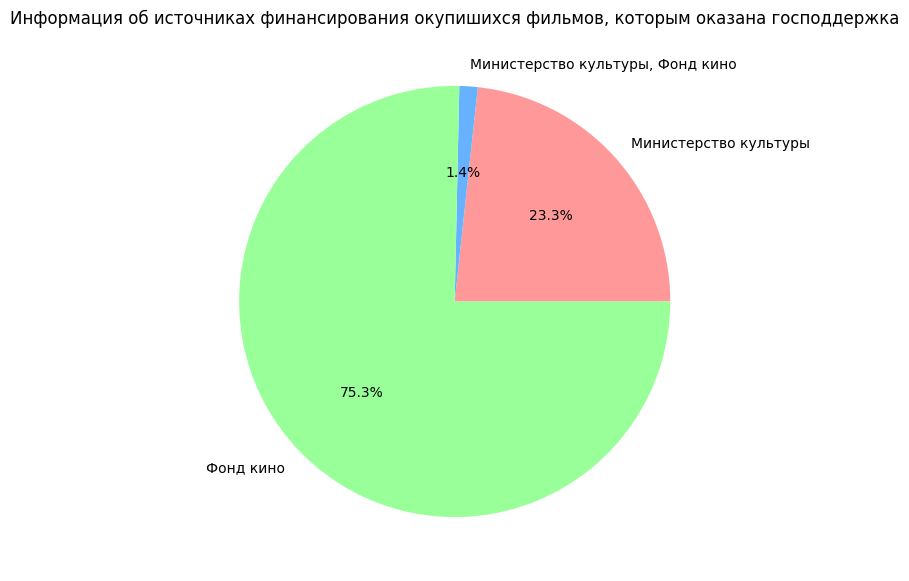

In [134]:
(
    data_with_support[data_with_support['payback'] == True]
    .groupby('financing_source')['budget']
    .agg('count')
    .plot.pie(figsize=(7, 7),
              title='Информация об источниках финансирования окупишихся фильмов, которым оказана господдержка',
              autopct='%1.1f%%',
              ylabel='',
              colors=['#FF9999', '#66B2FF', '#99FF99'])
);

Несмотря на то, что Министерство культуры финансировало больше фильмов, для 75.3% окупившихся фильмов источником финансирования является Фонд кино.

Посмотрим на окупаемость по жанрам фильмов.

In [135]:
data_with_support_payback_by_genre = (
    data_with_support
    .groupby('genres_main')
    .agg(number_of_films=('payback', 'count'),
         number_of_profitable_films=('payback', lambda x: x.sum()),
         percents=('payback', lambda x: 100 * x.mean()))
    .sort_values(by='percents', ascending=False)
)
data_with_support_payback_by_genre.style.format({'percents': '{:.2f}'})

,number_of_films,number_of_profitable_films,percents
genres_main,,,
спорт,3,2,66.67
семейный,7,3,42.86
комедия,74,29,39.19
биография,3,1,33.33
военный,9,3,33.33
боевик,6,2,33.33
ужасы,10,3,30.00
мультфильм,31,8,25.81
история,4,1,25.00


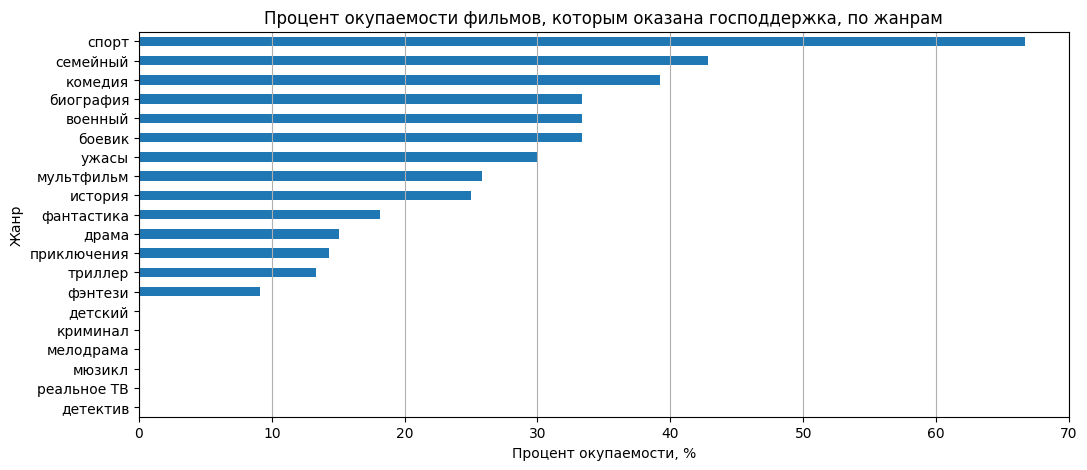

In [136]:
ax = data_with_support_payback_by_genre['percents'].sort_values().plot(
        kind='barh', figsize=(12, 5), grid=True, ylabel='Жанр', xlabel='Количество фильмов', rot=0)

ax.grid(axis='y')
ax.set_ylabel('Жанр')
ax.set_xlabel('Процент окупаемости, %')
ax.set_title('Процент окупаемости фильмов, которым оказана господдержка, по жанрам')
plt.show()

Вспомним, что чаще всего государственную поддержку получают фильмы, относящиеся к жанрам драма, комедия или мультфильм, редко - спорт. Здесь мы получили неожиданный результат. Оказывается, 2 из 3 фильмов жанра "спорт" окупились. Комедии окупались в 39.2% случаев. Драмы же окупились только в 15.1% случаев, мультфильмы - в 25.8%.

<a name='господдержка-рейтинг'></a>
Изучим значения рейтинга фильмов, получивших господдержку.

In [137]:
# вычислим коэффициент кореляции Пирсона
data_with_support['ratings'].corr(data['support'])

0.10222216319847745

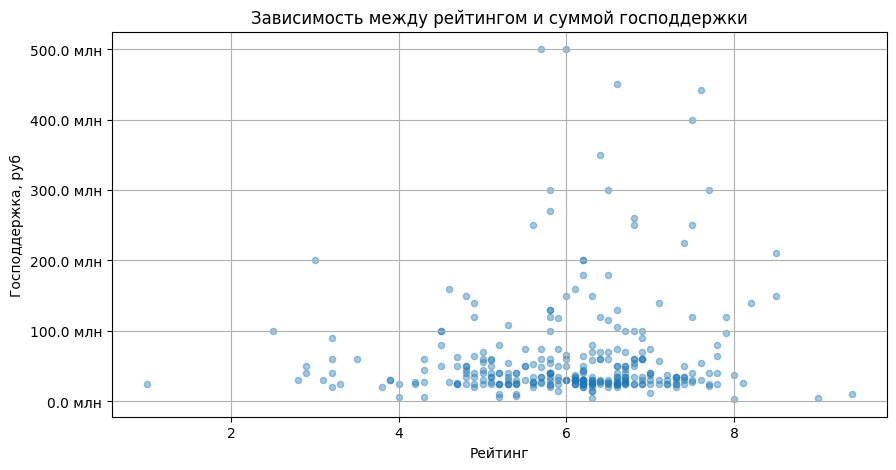

In [138]:
ax = data_with_support.plot(
        x='ratings', y='support', kind='scatter', figsize=(10, 5), grid=True, alpha=0.4,
        title='Зависимость между рейтингом и суммой господдержки', xlabel='Рейтинг', ylabel='Господдержка, руб')
plt.gca().get_yaxis().set_major_formatter(millions)
plt.show()

In [139]:
data_with_support['ratings'].describe()

count   316.00
mean      6.02
std       1.15
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64

In [140]:
data_with_support[data_with_support['payback'] == True]['ratings'].describe()

count   72.00
mean     6.13
std      1.08
min      2.90
25%      5.30
50%      6.25
75%      6.83
max      8.50
Name: ratings, dtype: float64

Зависимость между суммой господдержки и рейтингом не прослеживается. На графике видно, что есть как фильмы с высоким рейтингом, получившие небольшую сумму господдержки, так и фильмы, в которые были вложены крупные суммы, однако их рейтинг ниже 8. Четверть фильмов, получивших господдержку, имеет рейтинг от 1 до 5.3, половина фильмов - от 5.3 до 6.7, и оставшиеся - от 6.7 до 9.4. Если рассматривать только окупившиеся фильмы, то для них рейтинг находится в диапазоне от 2.9 до 8.5, медианное значение - 6.25.

<a name='господдержка-возрастное-ограничение'></a>
Посмотрим, фильмы с каким возрастным ограничением, получали господдержку чаще остальных.

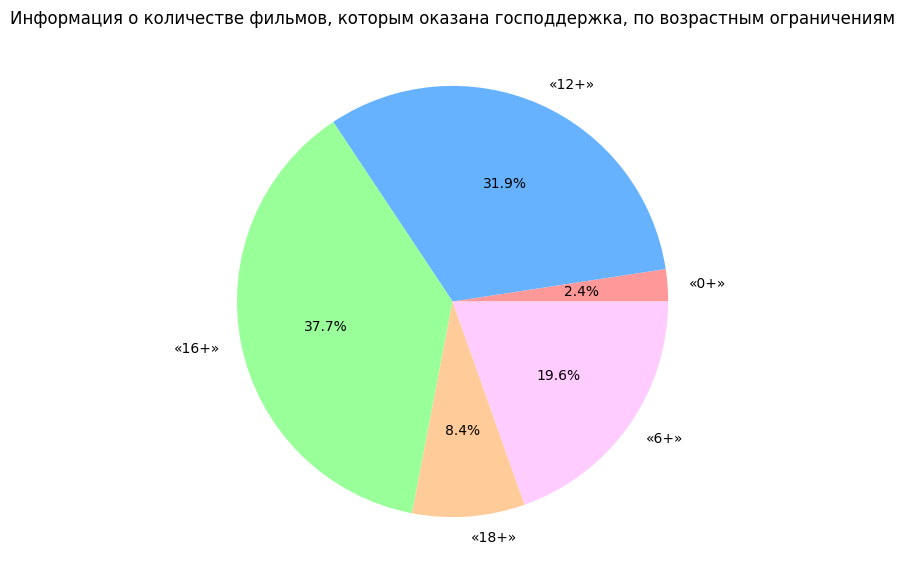

In [141]:
(
    data_with_support
    .groupby('age_restriction')['budget']
    .agg('count')
    .plot.pie(figsize=(7, 7),
              title='Информация о количестве фильмов, которым оказана господдержка, по возрастным ограничениям',
              autopct='%1.1f%%',
              ylabel='',
              colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFCCFF'])
);

Посмотрим на окупаемость фильмов в зависимости от возрастоного ограничения.

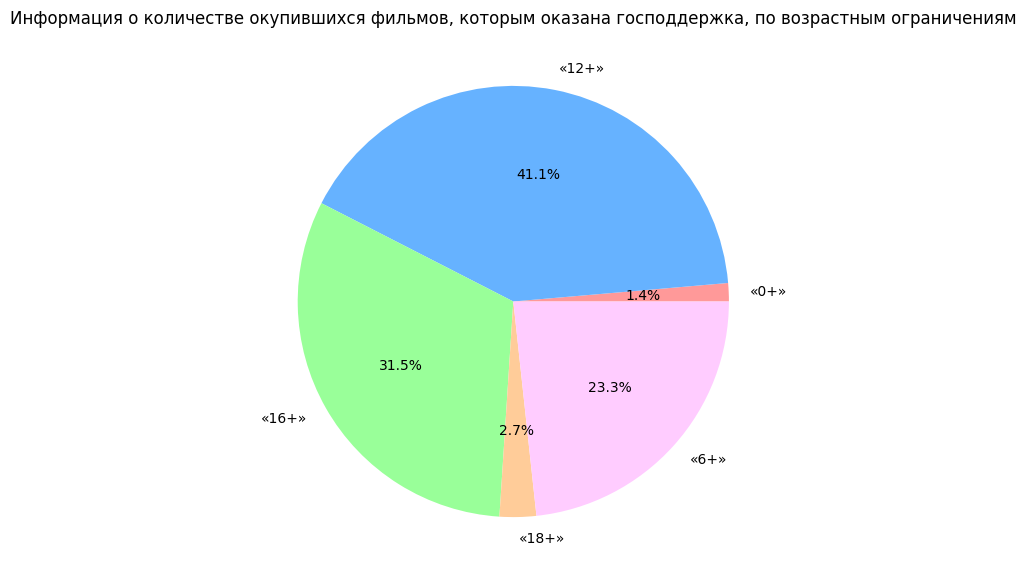

In [142]:
(
    data_with_support[data_with_support['payback'] == True]
    .groupby('age_restriction')['budget']
    .agg('count')
    .plot.pie(figsize=(7, 7),
              title='Информация о количестве окупившихся фильмов, которым оказана господдержка, по возрастным ограничениям',
              autopct='%1.1f%%',
              ylabel='',
              colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFCCFF'])
);

Чаще всего государственное финансирование оказывалось фильмам категорий "16+" и "12+" (37.7% и 31.9%). Cреди окупившихся фильмов также преобладают эти категории (31.5% и 41.1%). 

<a  name="промежуточный-вывод-4"></a>
__Промежуточный вывод__

- В рамках нашего иследования считаем, что окупаемость достигается, когда общие кассовые сборы превышают бюджет, затраченный на производство картины. Вместе с тем стоит отметить, что обычно продвижение фильма в соцсетях, коллаборации с блогерами, реклама на телевидении и радио в бюджет фильма не входит.

- Проанализированы 332 записи, по которым есть данные о государственном финансировании. Количество фильмов, которым оказывалась господдержка, с 2015 по 2017 год снизилось почти в 2 раза, с 2017 снова начало расти. Наблюдается рост сумм, затраченных на финансирование, с 2015 по 2016 год, затем спад в 2017 (соответствует уменьшению количества фильмов), и снова устойчивый рост с 2017 по 2019 год. Объём невозвратных средств всегда значительно превышает объем возвратных средств государственной поддержки. Больше всего средств на поддержку фильмов затрачено в 2019 - 4 904 000 000 руб.

- За период 2015-2019 гг. медианное значение количества спонсируемых фильмов - 61, медианная сумма оказываемой поддержки - 3 656 241 459 руб, медианная доля возвратных средств - 19,21%. Наибольшая медианная сумма, затрачиваемая на поддержку одному фильму, составила 67 173 972.5 руб в 2013 году, наименьшая - 27 500 000 руб в 2014. Затем ее значение растет и к 2018 году достигает 45 000 000 руб, в 2019 году снижается до 40 000 000 руб.

- 49.4% проектов финансируются Министерством культуры, 44% Фондом кино, а 6.6% получили финансирование из обоих источников. Для 75.3% окупившихся фильмов источником финансирования является Фонд кино.

- Максимальный объем безвозвратной поддержки составил 400 000 000 руб. Такую сумму получили фильмы "Движение вверх"(2017 г.), "Cоюз спасения"(2019 г.), "Вторжение"(2019 г.), из них окупился только первый. Максимальный объем возвратной поддержки 180 000 000 руб. получил фильм "Тайна печати дракона"(2019 г.), который не окупился. 

- Можно отметить, что в среднем окупается около 22% фильмов, получивших господдержку. Наиболее удачными в этом плане были 2017-2018 годы, окупились 32% фильмов. В 2019 году процент окупаемости и вовсе составил 16%.

- В основном государственную поддержку получают фильмы, относящиеся к жанрам драма, комедия или мультфильм (рассчитаны на широкую аудиторию), реже всего - фильмы жанра реальное ТВ, биография, спорт, криминал. Вместе с тем, 2 из 3 фильмов жанра "спорт" окупились. Комедии окупались в 39.2% случаев. Драмы же окупились только в 15.1% случаев, мультфильмы - в 25.8%.

- Зависимость между суммой господдержки и рейтингом не прослеживается. Есть как фильмы с высоким рейтингом, получившие небольшую сумму господдержки, так и фильмы, в которые были вложены крупные суммы, однако их рейтинг ниже 8. Четверть фильмов, получивших господдержку, имеет рейтинг от 1 до 5.3, половина фильмов - от 5.3 до 6.7, и оставшиеся - от 6.7 до 9.4. Рейтинг окупившихся фильмов находится в диапазоне от 2.9 до 8.5, медианное значение - 6.25.

- Чаще всего государственное финансирование оказывалось фильмам категорий "16+" и "12+" (37.7% и 31.9%). Cреди окупившихся фильмов также преобладают эти категории (31.5% и 41.1%).

<a name = 'общий-вывод'></a>
### Общий вывод

Данное исследование проводилось с данными, опубликованными на портале открытых данных Министерства культуры, содержащими информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

Мы сформировали датафрейм из 2 файлов с данными, проверили, что все объекты из датасета mkrf_movies вошли в него. В рамках этого преобразовали тип данных в столбце 'puNumber' в числовой, изменили название столбца на соответствующее змеиному стилю. Удалили строку с ошибочным значением в этом столбце.

Во время предобработки данных преобразовали тип данных для столбцов `show_start_date` в datetime, `ratings` в float. Значения в столбце `ratings` приведены к одному виду - дробные числа до 10.

Обнаружили большое количество пропущенных значений. Большое количество пропусков в данных о государственном финансировании (столбцы `budget`, `financing_source`, `refundable_support`, `nonrefundable_support`) вызвано особенностями выборки (большую часть составляют фильмы, не получавшие государственного финансирования); более чем для половины фильмов отсутствуют данные о кассовых сборах при показах фильмов в российских кинотеатрах. Возможно, информация не была предоставлена для подсчета статистики, либо она была предоставлена некорректно, несвоевременно, и не была учтена в итоговых отчетах;
информация о рейтинге фильма на КиноПоиске может отсутствовать из-за того, что рейтинг у фильма еще не был сформирован;
отсутствует информация о жанре, продюсере, наименьшее количество пропусков в данных о режиссере, студии и стране производства фильма. Найти логичную замену пропускам не удалось.

Явные дубликаты и дубликаты по ключевым параметрам (номеру прокатного удостоверения, названию и режиссеру) отсутствуют. Практически для всех категориальных столбцов выявлена общая проблема - несогласованное форматирование значений (наличие лишних или некорректно расставленных пробелов вокруг значений, использование различных разделителей (запятая, дефис) для разбивки списка значений). Мы  записали прописными буквами названия фильмов, студий, имена режиссеров и продюсеров. избавились от лишних пробелов в значениях категориальных переменных, осуществили замену "ё" на "е". Исправили ошибки в названиях стран, записали их через запятую без пробелов. Значения `film_studio` записали через запятую без пробелов. Для удобного представления информации о возрастных ограничениях сократили возрастную категорию до значения возраста в кавычках. Заменили некорректные значения бюджета на медианное значение по выборке для фильмов, чей бюджет указан корректно.

Добавили новые столбцы: информация о годе проката `show_start_date_year`, главном режиссере (первом из списка режиссеров) `director_main`, основном жанре (первом из списка жанров) `genres_main`, данные о доле государственной поддержки от общего бюджета фильма `share_of_support`, категория фильма в зависимости от страны производства `film_country_category`('российское' (если страна производства Россия), 'иное').

В результате анализа данных выявлено:

- **Данные о прокате в кинотеатрах известны для 43.38% фильмов**, есть данные за каждый год с 2010 по 2019. Много данных имеется за период 2015-2019 гг. (фильмы с указанной информацией о прокате в кинотеатрах составляют более 53% за год), однако **полнее всего представлен период 2015-2017 (записей с информацией о прокате в кинотеатрах более 66%)**. Больше всего данных о выходе фильмов в прокат в кинотеатрах за 2017 год (70.69% от общего числа фильмов за год). Медианное значение количества фильмов, выпускаемых в прокат за год - 726, выпускаемых в прокат в кинотеатрах - 312. Можно предположить, что на рост количества внесенных данных в 2014-2015 годах повлияло подключение кинотеатров небольших городов и введение ответственности за непредоставление данных. Большую долю фильмов, по которым имеется информация о прокате в кинотеатрах, составляют фильмы, выпущенные в других странах(не в России), тенденции к изменению этого соотношения не наблюдается. В 2017 году наблюдалось снижение количества российских фильмов, вышедших в прокат в кинотеатрах.

- Несмотря на то, что больше всего записей о фильмах, вышедших в прокат в 2019 году, **максимальная сумма сборов** была достигнута **в 2018** и составила **49 662 863 161** рубль. Меньше всего данных о кассовых сборах за 2010 год - всего о 78 фильмах, отсюда и наименьшая сумма кассовых сборов - 810 766 рублей. За период с 2015 по 2019 год, **наименьшая сумма кассовых сборов за 2015 год - 39 497 356 036** рублей. За период 2015 по 2018 наблюдался рост кассовых сборов российских фильмов, несмотря на снижение их количества в 2017 со 132 до 52. Суммарные кассовые сборы всех российских фильмов, вышедших в 2019 году, снизились. Кассовые сборы фильмов, выпущенных в других странах, растут, был временный спад в 2018 году.

- Среднее значение сборов всегда превышает медианное. На среднее значение сборов очень сильно влияют блокбастеры, кассовые сборы которых намного превосходят медианные значения. **Наибольшее среднее и медианное** значение кассовых сборов за **2017** год - **136 032 793.33** руб и **9 968 340** руб. С 2015 по 2019 годы **самое низкое** среднее и медианное значение за **2016** год - **84 438 445.33** руб и **3 778 317.80** руб.

- Возрастное ограничение влияет на сборы фильма в прокате. За 2015-2019 гг. доли фильмов "16+" и "18+" практически равны, 34.2% и 33.8% соответственно. Доли фильмов "12+" и "6+" - 14.8% и 13.4%. Меньше всего представлены фильмы "0+" - всего 3.8%. При этом **по кассовым сборам** за этот период **лидируют фильмы "16+"** - 33.1%. Доля сборов фильмов категории "0+" крайне мала - 0.4%. Такие фильмы меньше всего пользуются популярностью при посещении кинотеатров. Фильмы "18+" принесли только 17.7%, фильмы "12+" и "6+", хотя и были представлены в меньшем количестве, чем "18+", собрали почти равные доли - 25.8% и 23.0%. Значительная часть данных о кассовых сборах для всех возрастных категорий сосредоточена в низких значениях. Наблюдается некоторая тенденция к росту кассовых сборов для категорий "6+" и "18+" (за исключением спада в 2018, хотя количество фильмов, которые были в прокате в кинотеатрах в этом году, было больше, чем за предыдущий год). **Фильмы "12+" собрали больше остальных в 2015** году (предположительно, из-за выхода блокбастеров, продолжений историй, имеющих свою широкую аудиторию еще до премьеры). Для фильмов "12+" наблюдалось резкое уменьшение суммы сборов в 2017 году (в этот год в прокат вышло наименьшее число фильмов данной категории, почти в 2 раза меньше, чем за 2016 год). **Кассовые сборы фильмов "16+"** росли с 2015 года и **в 2017** году достигли пикового значения (в том числе среди остальных категорий за весь период)- **18 745 042 900** руб, в 2018-2019 годах наблюдается спад. Кассовые сборы фильмов "16+", "12+" и "6+", близки друг к другу и превышают значения остальных категорий. Можно предположить, что в 2019 году в лидеры выбилась категория "6+" за счет популярности анимационных фильмов, входящих в топ-5 в том числе не только среди детей, но и среди взрослой аудитории. Некоторые из фильмов также являются продолжениям уже известных полюбившихся широкой аудитории историй.

Результаты анализа фильмов, получивших господдержку:

- В рамках нашего иследования приняли, что окупаемость достигается, когда общие кассовые сборы превышают бюджет.

- Проанализированы **332 записи, по которым есть данные о государственном финансировании**. Количество фильмов, которым оказывалась господдержка, с 2015 по 2017 год снизилось почти в 2 раза, с 2017 снова начало расти. Наблюдается рост сумм, затраченных на финансирование, с 2015 по 2016 год, затем спад в 2017 (соответствует уменьшению количества фильмов), и снова устойчивый рост с 2017 по 2019 год. **Объём невозвратных средств всегда значительно превышает объем возвратных средств государственной поддержки**. Больше всего средств на поддержку фильмов затрачено в 2019 - 4 904 000 000 руб.

- За период 2015-2019 гг. **медианное значение количества спонсируемых фильмов - 61, медианная сумма оказываемой поддержки - 3 656 241 459 руб, медианная доля возвратных средств - 19,21%**. Наибольшая медианная сумма, затрачиваемая на поддержку одному фильму, составила 67 173 972.5 руб в 2013 году, наименьшая - 27 500 000 руб в 2014. Затем ее значение растет и к 2018 году достигает 45 000 000 руб, в 2019 году снижается до 40 000 000 руб.

- 49.4% проектов финансируются Министерством культуры, 44% Фондом кино, а 6.6% получили финансирование из обоих источников. Для 75.3% окупившихся фильмов источником финансирования является Фонд кино.

- **Максимальный объем безвозвратной поддержки - 400 000 000** руб. Такую сумму получили фильмы "Движение вверх"(2017 г.), "Cоюз спасения"(2019 г.), "Вторжение"(2019 г.), из них окупился только первый. **Максимальный объем возвратной поддержки 180 000 000** руб. получил фильм "Тайна печати дракона"(2019 г.), который не окупился.

- Можно отметить, что **в среднем окупается около 22% фильмов, получивших господдержку**. Наиболее удачными в этом плане были 2017-2018 годы, окупились почти 32% фильмов. В 2019 году процент окупаемости и вовсе составил 16%.

- В основном государственную поддержку получают фильмы, относящиеся к жанрам **драма, комедия или мультфильм** (рассчитаны на широкую аудиторию), реже всего - фильмы жанра реальное ТВ, биография, спорт, криминал. Вместе с тем, 2 из 3 фильмов жанра "спорт" окупились. Комедии окупались в 39.2% случаев. Драмы же окупились только в 15.1% случаев, мультфильмы - в 25.8%.

- Зависимость между суммой господдержки и рейтингом не прослеживается. Есть как фильмы с высоким рейтингом, получившие небольшую сумму господдержки, так и фильмы, в которые были вложены крупные суммы, однако их рейтинг ниже 8. Четверть фильмов, получивших господдержку, имеет рейтинг от 1 до 5.3, половина фильмов - от 5.3 до 6.7, и оставшиеся - от 6.7 до 9.4. **Рейтинг окупившихся фильмов находится в диапазоне от 2.9 до 8.5, среднее значение - 6.25**.

- Чаще всего государственное финансирование оказывалось фильмам категорий "16+" и "12+" (37.7% и 31.9%). Cреди окупившихся фильмов также преобладают эти категории (31.5% и 41.1%).